#### Gathering of all functions needed to train a model:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import load_model
from numpy import argmax

def read_csv(filename):
    dataset = pd.read_csv(filename, encoding='utf-8')
    return dataset

def one_hot_encode(dataset):
    dataset_one_hot_encoded = pd.get_dummies(dataset)  
    return dataset_one_hot_encoded

def divide_X_y(dataset, index_sep):
    X = dataset.iloc[:,:index_sep]
    y = dataset.iloc[:,index_sep:]
    return X,y

def split_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    return X_train, X_test, y_train, y_test
    
def graph_loss_vs_epochs(history, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    epoch_count = range(1, len(training_loss) + 1)
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)
    
def load_history(filename):
    history=np.load(filename,allow_pickle='TRUE').item()
    return history

def evaluate_model(model, X_test, y_test):
    print('\nEvaluating:')
    (test_loss, test_accuracy) = model.evaluate(X_test, y_test)
    print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')
    
def get_label(column):
    label = y_test.columns[column]
    return label.replace('Nivel de Adaptación_', '')

def fill_test_ds_labels(model, test_ds_filename, output_test_filename):
    test_ds = read_csv(test_ds_filename)
    test_ds = pd.get_dummies(test_ds)
    nivel_de_adaptacion_test_ds = []
    for index,test in test_ds.iterrows():
        test_ds_pred = pd.DataFrame(test).transpose()
        test_oh = pd.get_dummies(test_ds_pred)
        prediction = model.predict(test_oh)
        nivel_de_adaptacion_test_ds.append((index+1,get_label(argmax(prediction))))
    print(len(nivel_de_adaptacion_test_ds))
    nivel_de_adaptacion_df = pd.DataFrame(nivel_de_adaptacion_test_ds, columns=['id','Nivel de Adaptación']).reset_index(drop=True)
    nivel_de_adaptacion_df.to_csv(output_test_filename,index=False)

##### Loading, preparing and dividing dataset for Experiments:

In [2]:
test_ds_filename = '../test-ds.csv'
index_sep = 31
test_size=0.2
dataset = read_csv('../training-ds.csv')
dataset = one_hot_encode(dataset)
X, y = divide_X_y(dataset, index_sep)
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size)

##### Model 3 Definition:
    Model 3 consists in 3 hidden Dense layers:

In [17]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

#### Model 3 V1:
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = SGD
    16 units in hidden layers, all of them with relu activation fn

Epoch 1/1000

Epoch 1: val_loss improved from inf to 1.09735, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 1.1023 - accuracy: 0.3645 - val_loss: 1.0973 - val_accuracy: 0.3523 - 921ms/epoch - 71ms/step
Epoch 2/1000

Epoch 2: val_loss improved from 1.09735 to 1.08437, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 1.0899 - accuracy: 0.3826 - val_loss: 1.0844 - val_accuracy: 0.3782 - 559ms/epoch - 43ms/step
Epoch 3/1000

Epoch 3: val_loss improved from 1.08437 to 1.07257, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 1.0777 - accuracy: 0.4073 - val_loss: 1.0726 - val_accuracy: 0.4145 - 535ms/epoch - 41ms/step
Epoch 4/1000

Epoch 4: val_loss improved from 1.07257 to 1.06086, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 1.0668

Epoch 31/1000

Epoch 31: val_loss improved from 0.91828 to 0.91683, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.9277 - accuracy: 0.4994 - val_loss: 0.9168 - val_accuracy: 0.5648 - 837ms/epoch - 64ms/step
Epoch 32/1000

Epoch 32: val_loss improved from 0.91683 to 0.91403, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.9263 - accuracy: 0.5032 - val_loss: 0.9140 - val_accuracy: 0.5648 - 634ms/epoch - 49ms/step
Epoch 33/1000

Epoch 33: val_loss improved from 0.91403 to 0.91271, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.9244 - accuracy: 0.5032 - val_loss: 0.9127 - val_accuracy: 0.5648 - 594ms/epoch - 46ms/step
Epoch 34/1000

Epoch 34: val_loss improved from 0.91271 to 0.91081, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - 

Epoch 62/1000

Epoch 62: val_loss improved from 0.88185 to 0.88138, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.8921 - accuracy: 0.5227 - val_loss: 0.8814 - val_accuracy: 0.5751 - 546ms/epoch - 42ms/step
Epoch 63/1000

Epoch 63: val_loss improved from 0.88138 to 0.88062, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.8910 - accuracy: 0.5370 - val_loss: 0.8806 - val_accuracy: 0.5855 - 564ms/epoch - 43ms/step
Epoch 64/1000

Epoch 64: val_loss improved from 0.88062 to 0.87932, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.8899 - accuracy: 0.5383 - val_loss: 0.8793 - val_accuracy: 0.5803 - 687ms/epoch - 53ms/step
Epoch 65/1000

Epoch 65: val_loss improved from 0.87932 to 0.87825, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - 

Epoch 93/1000

Epoch 93: val_loss improved from 0.84935 to 0.84836, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.8557 - accuracy: 0.6031 - val_loss: 0.8484 - val_accuracy: 0.6321 - 600ms/epoch - 46ms/step
Epoch 94/1000

Epoch 94: val_loss improved from 0.84836 to 0.84661, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.8541 - accuracy: 0.6122 - val_loss: 0.8466 - val_accuracy: 0.6321 - 812ms/epoch - 62ms/step
Epoch 95/1000

Epoch 95: val_loss improved from 0.84661 to 0.84655, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.8531 - accuracy: 0.6057 - val_loss: 0.8465 - val_accuracy: 0.6373 - 569ms/epoch - 44ms/step
Epoch 96/1000

Epoch 96: val_loss improved from 0.84655 to 0.84601, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - 

13/13 - 1s - loss: 0.8142 - accuracy: 0.6446 - val_loss: 0.8043 - val_accuracy: 0.6632 - 619ms/epoch - 48ms/step
Epoch 125/1000

Epoch 125: val_loss did not improve from 0.80428
13/13 - 0s - loss: 0.8129 - accuracy: 0.6446 - val_loss: 0.8045 - val_accuracy: 0.6684 - 52ms/epoch - 4ms/step
Epoch 126/1000

Epoch 126: val_loss improved from 0.80428 to 0.80230, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.8119 - accuracy: 0.6602 - val_loss: 0.8023 - val_accuracy: 0.6632 - 570ms/epoch - 44ms/step
Epoch 127/1000

Epoch 127: val_loss did not improve from 0.80230
13/13 - 0s - loss: 0.8105 - accuracy: 0.6446 - val_loss: 0.8053 - val_accuracy: 0.6684 - 52ms/epoch - 4ms/step
Epoch 128/1000

Epoch 128: val_loss did not improve from 0.80230
13/13 - 0s - loss: 0.8099 - accuracy: 0.6654 - val_loss: 0.8039 - val_accuracy: 0.6684 - 48ms/epoch - 4ms/step
Epoch 129/1000

Epoch 129: val_loss improved from 0.80230 to 0.80099, saving model

13/13 - 0s - loss: 0.7786 - accuracy: 0.6719 - val_loss: 0.7657 - val_accuracy: 0.6684 - 53ms/epoch - 4ms/step
Epoch 159/1000

Epoch 159: val_loss did not improve from 0.76547
13/13 - 0s - loss: 0.7773 - accuracy: 0.6667 - val_loss: 0.7658 - val_accuracy: 0.6736 - 70ms/epoch - 5ms/step
Epoch 160/1000

Epoch 160: val_loss improved from 0.76547 to 0.76330, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.7766 - accuracy: 0.6706 - val_loss: 0.7633 - val_accuracy: 0.6736 - 564ms/epoch - 43ms/step
Epoch 161/1000

Epoch 161: val_loss improved from 0.76330 to 0.75963, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.7754 - accuracy: 0.6719 - val_loss: 0.7596 - val_accuracy: 0.6736 - 612ms/epoch - 47ms/step
Epoch 162/1000

Epoch 162: val_loss did not improve from 0.75963
13/13 - 0s - loss: 0.7746 - accuracy: 0.6680 - val_loss: 0.7611 - val_accuracy: 0.6736 - 41ms/

INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.7445 - accuracy: 0.6796 - val_loss: 0.7290 - val_accuracy: 0.6995 - 756ms/epoch - 58ms/step
Epoch 195/1000

Epoch 195: val_loss improved from 0.72900 to 0.72646, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.7438 - accuracy: 0.6835 - val_loss: 0.7265 - val_accuracy: 0.7098 - 678ms/epoch - 52ms/step
Epoch 196/1000

Epoch 196: val_loss did not improve from 0.72646
13/13 - 0s - loss: 0.7433 - accuracy: 0.6809 - val_loss: 0.7302 - val_accuracy: 0.7047 - 47ms/epoch - 4ms/step
Epoch 197/1000

Epoch 197: val_loss did not improve from 0.72646
13/13 - 0s - loss: 0.7420 - accuracy: 0.6861 - val_loss: 0.7302 - val_accuracy: 0.7098 - 39ms/epoch - 3ms/step
Epoch 198/1000

Epoch 198: val_loss did not improve from 0.72646
13/13 - 0s - loss: 0.7412 - accuracy: 0.6900 - val_loss: 0.7316 - val_accuracy: 0.6943 - 43ms/epoch - 3ms/step
Epoch 199/1000

Epoch 

Epoch 232/1000

Epoch 232: val_loss did not improve from 0.69895
13/13 - 0s - loss: 0.7115 - accuracy: 0.6887 - val_loss: 0.7039 - val_accuracy: 0.7150 - 54ms/epoch - 4ms/step
Epoch 233/1000

Epoch 233: val_loss improved from 0.69895 to 0.69624, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.7113 - accuracy: 0.6874 - val_loss: 0.6962 - val_accuracy: 0.7202 - 607ms/epoch - 47ms/step
Epoch 234/1000

Epoch 234: val_loss did not improve from 0.69624
13/13 - 0s - loss: 0.7091 - accuracy: 0.6913 - val_loss: 0.6963 - val_accuracy: 0.7202 - 60ms/epoch - 5ms/step
Epoch 235/1000

Epoch 235: val_loss did not improve from 0.69624
13/13 - 0s - loss: 0.7086 - accuracy: 0.6913 - val_loss: 0.7036 - val_accuracy: 0.7150 - 51ms/epoch - 4ms/step
Epoch 236/1000

Epoch 236: val_loss did not improve from 0.69624
13/13 - 0s - loss: 0.7093 - accuracy: 0.6952 - val_loss: 0.7021 - val_accuracy: 0.7202 - 51ms/epoch - 4ms/step
Epoch 237/1000

Epo

INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.6845 - accuracy: 0.7173 - val_loss: 0.6780 - val_accuracy: 0.7306 - 922ms/epoch - 71ms/step
Epoch 270/1000

Epoch 270: val_loss did not improve from 0.67802
13/13 - 0s - loss: 0.6835 - accuracy: 0.7134 - val_loss: 0.6802 - val_accuracy: 0.7254 - 44ms/epoch - 3ms/step
Epoch 271/1000

Epoch 271: val_loss did not improve from 0.67802
13/13 - 0s - loss: 0.6832 - accuracy: 0.7082 - val_loss: 0.6821 - val_accuracy: 0.7254 - 46ms/epoch - 4ms/step
Epoch 272/1000

Epoch 272: val_loss did not improve from 0.67802
13/13 - 0s - loss: 0.6831 - accuracy: 0.7095 - val_loss: 0.6795 - val_accuracy: 0.7306 - 45ms/epoch - 3ms/step
Epoch 273/1000

Epoch 273: val_loss did not improve from 0.67802
13/13 - 0s - loss: 0.6823 - accuracy: 0.7108 - val_loss: 0.6816 - val_accuracy: 0.7306 - 52ms/epoch - 4ms/step
Epoch 274/1000

Epoch 274: val_loss improved from 0.67802 to 0.67611, saving model to models\model_3_v1
INFO:tensorflow:Ass

Epoch 306/1000

Epoch 306: val_loss did not improve from 0.66532
13/13 - 0s - loss: 0.6623 - accuracy: 0.7185 - val_loss: 0.6658 - val_accuracy: 0.7202 - 49ms/epoch - 4ms/step
Epoch 307/1000

Epoch 307: val_loss improved from 0.66532 to 0.66412, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.6629 - accuracy: 0.7173 - val_loss: 0.6641 - val_accuracy: 0.7254 - 786ms/epoch - 60ms/step
Epoch 308/1000

Epoch 308: val_loss did not improve from 0.66412
13/13 - 0s - loss: 0.6619 - accuracy: 0.7134 - val_loss: 0.6714 - val_accuracy: 0.7254 - 48ms/epoch - 4ms/step
Epoch 309/1000

Epoch 309: val_loss did not improve from 0.66412
13/13 - 0s - loss: 0.6632 - accuracy: 0.7095 - val_loss: 0.6684 - val_accuracy: 0.7306 - 51ms/epoch - 4ms/step
Epoch 310/1000

Epoch 310: val_loss did not improve from 0.66412
13/13 - 0s - loss: 0.6610 - accuracy: 0.7147 - val_loss: 0.6644 - val_accuracy: 0.7254 - 52ms/epoch - 4ms/step
Epoch 311/1000

Epo

13/13 - 1s - loss: 0.6427 - accuracy: 0.7147 - val_loss: 0.6489 - val_accuracy: 0.7358 - 552ms/epoch - 42ms/step
Epoch 343/1000

Epoch 343: val_loss did not improve from 0.64894
13/13 - 0s - loss: 0.6417 - accuracy: 0.7134 - val_loss: 0.6506 - val_accuracy: 0.7254 - 54ms/epoch - 4ms/step
Epoch 344/1000

Epoch 344: val_loss did not improve from 0.64894
13/13 - 0s - loss: 0.6411 - accuracy: 0.7160 - val_loss: 0.6505 - val_accuracy: 0.7254 - 49ms/epoch - 4ms/step
Epoch 345/1000

Epoch 345: val_loss did not improve from 0.64894
13/13 - 0s - loss: 0.6403 - accuracy: 0.7211 - val_loss: 0.6492 - val_accuracy: 0.7306 - 57ms/epoch - 4ms/step
Epoch 346/1000

Epoch 346: val_loss did not improve from 0.64894
13/13 - 0s - loss: 0.6401 - accuracy: 0.7147 - val_loss: 0.6498 - val_accuracy: 0.7254 - 46ms/epoch - 4ms/step
Epoch 347/1000

Epoch 347: val_loss improved from 0.64894 to 0.64781, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 

Epoch 385/1000

Epoch 385: val_loss did not improve from 0.64205
13/13 - 0s - loss: 0.6183 - accuracy: 0.7471 - val_loss: 0.6509 - val_accuracy: 0.7461 - 44ms/epoch - 3ms/step
Epoch 386/1000

Epoch 386: val_loss did not improve from 0.64205
13/13 - 0s - loss: 0.6184 - accuracy: 0.7445 - val_loss: 0.6423 - val_accuracy: 0.7358 - 44ms/epoch - 3ms/step
Epoch 387/1000

Epoch 387: val_loss improved from 0.64205 to 0.64150, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.6163 - accuracy: 0.7328 - val_loss: 0.6415 - val_accuracy: 0.7306 - 829ms/epoch - 64ms/step
Epoch 388/1000

Epoch 388: val_loss improved from 0.64150 to 0.64132, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.6159 - accuracy: 0.7328 - val_loss: 0.6413 - val_accuracy: 0.7461 - 591ms/epoch - 45ms/step
Epoch 389/1000

Epoch 389: val_loss improved from 0.64132 to 0.64113, saving model to models\m

13/13 - 0s - loss: 0.5974 - accuracy: 0.7497 - val_loss: 0.6311 - val_accuracy: 0.7513 - 42ms/epoch - 3ms/step
Epoch 423/1000

Epoch 423: val_loss improved from 0.62712 to 0.62698, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.5976 - accuracy: 0.7639 - val_loss: 0.6270 - val_accuracy: 0.7720 - 657ms/epoch - 51ms/step
Epoch 424/1000

Epoch 424: val_loss improved from 0.62698 to 0.62481, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.5963 - accuracy: 0.7626 - val_loss: 0.6248 - val_accuracy: 0.7668 - 631ms/epoch - 49ms/step
Epoch 425/1000

Epoch 425: val_loss did not improve from 0.62481
13/13 - 0s - loss: 0.5961 - accuracy: 0.7626 - val_loss: 0.6259 - val_accuracy: 0.7668 - 49ms/epoch - 4ms/step
Epoch 426/1000

Epoch 426: val_loss did not improve from 0.62481
13/13 - 0s - loss: 0.5950 - accuracy: 0.7536 - val_loss: 0.6277 - val_accuracy: 0.7720 - 54ms/

13/13 - 1s - loss: 0.5746 - accuracy: 0.7730 - val_loss: 0.6175 - val_accuracy: 0.7565 - 570ms/epoch - 44ms/step
Epoch 463/1000

Epoch 463: val_loss improved from 0.61750 to 0.61732, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.5737 - accuracy: 0.7743 - val_loss: 0.6173 - val_accuracy: 0.7720 - 709ms/epoch - 55ms/step
Epoch 464/1000

Epoch 464: val_loss did not improve from 0.61732
13/13 - 0s - loss: 0.5733 - accuracy: 0.7730 - val_loss: 0.6275 - val_accuracy: 0.7358 - 51ms/epoch - 4ms/step
Epoch 465/1000

Epoch 465: val_loss improved from 0.61732 to 0.61633, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.5775 - accuracy: 0.7562 - val_loss: 0.6163 - val_accuracy: 0.7461 - 876ms/epoch - 67ms/step
Epoch 466/1000

Epoch 466: val_loss improved from 0.61633 to 0.61280, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\

13/13 - 0s - loss: 0.5495 - accuracy: 0.7795 - val_loss: 0.6396 - val_accuracy: 0.7358 - 52ms/epoch - 4ms/step
Epoch 504/1000

Epoch 504: val_loss did not improve from 0.60446
13/13 - 0s - loss: 0.5571 - accuracy: 0.7860 - val_loss: 0.6290 - val_accuracy: 0.7409 - 50ms/epoch - 4ms/step
Epoch 505/1000

Epoch 505: val_loss did not improve from 0.60446
13/13 - 0s - loss: 0.5533 - accuracy: 0.7821 - val_loss: 0.6097 - val_accuracy: 0.7565 - 54ms/epoch - 4ms/step
Epoch 506/1000

Epoch 506: val_loss did not improve from 0.60446
13/13 - 0s - loss: 0.5479 - accuracy: 0.7834 - val_loss: 0.6089 - val_accuracy: 0.7617 - 42ms/epoch - 3ms/step
Epoch 507/1000

Epoch 507: val_loss did not improve from 0.60446
13/13 - 0s - loss: 0.5468 - accuracy: 0.7821 - val_loss: 0.6055 - val_accuracy: 0.7565 - 51ms/epoch - 4ms/step
Epoch 508/1000

Epoch 508: val_loss did not improve from 0.60446
13/13 - 0s - loss: 0.5448 - accuracy: 0.7847 - val_loss: 0.6156 - val_accuracy: 0.7617 - 64ms/epoch - 5ms/step
Epoch 509

Epoch 546/1000

Epoch 546: val_loss did not improve from 0.59369
13/13 - 0s - loss: 0.5255 - accuracy: 0.7873 - val_loss: 0.6312 - val_accuracy: 0.7150 - 54ms/epoch - 4ms/step
Epoch 547/1000

Epoch 547: val_loss did not improve from 0.59369
13/13 - 0s - loss: 0.5337 - accuracy: 0.7951 - val_loss: 0.5953 - val_accuracy: 0.7513 - 53ms/epoch - 4ms/step
Epoch 548/1000

Epoch 548: val_loss did not improve from 0.59369
13/13 - 0s - loss: 0.5239 - accuracy: 0.7912 - val_loss: 0.5937 - val_accuracy: 0.7720 - 52ms/epoch - 4ms/step
Epoch 549/1000

Epoch 549: val_loss improved from 0.59369 to 0.58934, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.5232 - accuracy: 0.7977 - val_loss: 0.5893 - val_accuracy: 0.7513 - 513ms/epoch - 39ms/step
Epoch 550/1000

Epoch 550: val_loss did not improve from 0.58934
13/13 - 0s - loss: 0.5236 - accuracy: 0.7925 - val_loss: 0.5922 - val_accuracy: 0.7513 - 44ms/epoch - 3ms/step
Epoch 551/1000

Epo

Epoch 590/1000

Epoch 590: val_loss did not improve from 0.58658
13/13 - 0s - loss: 0.5070 - accuracy: 0.7977 - val_loss: 0.5897 - val_accuracy: 0.7565 - 54ms/epoch - 4ms/step
Epoch 591/1000

Epoch 591: val_loss did not improve from 0.58658
13/13 - 0s - loss: 0.5025 - accuracy: 0.8003 - val_loss: 0.5920 - val_accuracy: 0.7617 - 47ms/epoch - 4ms/step
Epoch 592/1000

Epoch 592: val_loss did not improve from 0.58658
13/13 - 0s - loss: 0.5026 - accuracy: 0.8016 - val_loss: 0.5916 - val_accuracy: 0.7513 - 52ms/epoch - 4ms/step
Epoch 593/1000

Epoch 593: val_loss improved from 0.58658 to 0.58445, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.5036 - accuracy: 0.7951 - val_loss: 0.5845 - val_accuracy: 0.7513 - 548ms/epoch - 42ms/step
Epoch 594/1000

Epoch 594: val_loss did not improve from 0.58445
13/13 - 0s - loss: 0.5005 - accuracy: 0.8003 - val_loss: 0.5850 - val_accuracy: 0.7617 - 48ms/epoch - 4ms/step
Epoch 595/1000

Epo

13/13 - 1s - loss: 0.4839 - accuracy: 0.7990 - val_loss: 0.5753 - val_accuracy: 0.7565 - 634ms/epoch - 49ms/step
Epoch 634/1000

Epoch 634: val_loss did not improve from 0.57527
13/13 - 0s - loss: 0.4809 - accuracy: 0.8067 - val_loss: 0.5890 - val_accuracy: 0.7824 - 51ms/epoch - 4ms/step
Epoch 635/1000

Epoch 635: val_loss did not improve from 0.57527
13/13 - 0s - loss: 0.4832 - accuracy: 0.8067 - val_loss: 0.5760 - val_accuracy: 0.7617 - 53ms/epoch - 4ms/step
Epoch 636/1000

Epoch 636: val_loss did not improve from 0.57527
13/13 - 0s - loss: 0.4811 - accuracy: 0.8054 - val_loss: 0.5805 - val_accuracy: 0.7668 - 48ms/epoch - 4ms/step
Epoch 637/1000

Epoch 637: val_loss did not improve from 0.57527
13/13 - 0s - loss: 0.4797 - accuracy: 0.8029 - val_loss: 0.6193 - val_accuracy: 0.7409 - 46ms/epoch - 4ms/step
Epoch 638/1000

Epoch 638: val_loss did not improve from 0.57527
13/13 - 0s - loss: 0.4856 - accuracy: 0.8054 - val_loss: 0.5851 - val_accuracy: 0.7565 - 47ms/epoch - 4ms/step
Epoch 6

Epoch 676/1000

Epoch 676: val_loss did not improve from 0.56699
13/13 - 0s - loss: 0.4629 - accuracy: 0.8093 - val_loss: 0.5772 - val_accuracy: 0.7772 - 53ms/epoch - 4ms/step
Epoch 677/1000

Epoch 677: val_loss improved from 0.56699 to 0.56408, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.4642 - accuracy: 0.8158 - val_loss: 0.5641 - val_accuracy: 0.7565 - 588ms/epoch - 45ms/step
Epoch 678/1000

Epoch 678: val_loss did not improve from 0.56408
13/13 - 0s - loss: 0.4663 - accuracy: 0.8054 - val_loss: 0.5886 - val_accuracy: 0.7565 - 48ms/epoch - 4ms/step
Epoch 679/1000

Epoch 679: val_loss did not improve from 0.56408
13/13 - 0s - loss: 0.4743 - accuracy: 0.8119 - val_loss: 0.5737 - val_accuracy: 0.7617 - 49ms/epoch - 4ms/step
Epoch 680/1000

Epoch 680: val_loss did not improve from 0.56408
13/13 - 0s - loss: 0.4664 - accuracy: 0.8093 - val_loss: 0.5743 - val_accuracy: 0.7772 - 53ms/epoch - 4ms/step
Epoch 681/1000

Epo

Epoch 721/1000

Epoch 721: val_loss did not improve from 0.55961
13/13 - 0s - loss: 0.4495 - accuracy: 0.8145 - val_loss: 0.5628 - val_accuracy: 0.7565 - 46ms/epoch - 4ms/step
Epoch 722/1000

Epoch 722: val_loss did not improve from 0.55961
13/13 - 0s - loss: 0.4449 - accuracy: 0.8158 - val_loss: 0.7025 - val_accuracy: 0.7409 - 50ms/epoch - 4ms/step
Epoch 723/1000

Epoch 723: val_loss did not improve from 0.55961
13/13 - 0s - loss: 0.4767 - accuracy: 0.8132 - val_loss: 0.5642 - val_accuracy: 0.7668 - 46ms/epoch - 4ms/step
Epoch 724/1000

Epoch 724: val_loss did not improve from 0.55961
13/13 - 0s - loss: 0.4488 - accuracy: 0.8210 - val_loss: 0.5929 - val_accuracy: 0.7513 - 57ms/epoch - 4ms/step
Epoch 725/1000

Epoch 725: val_loss did not improve from 0.55961
13/13 - 0s - loss: 0.4520 - accuracy: 0.8236 - val_loss: 0.5684 - val_accuracy: 0.7513 - 58ms/epoch - 4ms/step
Epoch 726/1000

Epoch 726: val_loss did not improve from 0.55961
13/13 - 0s - loss: 0.4450 - accuracy: 0.8184 - val_loss

Epoch 767/1000

Epoch 767: val_loss did not improve from 0.55934
13/13 - 0s - loss: 0.4332 - accuracy: 0.8275 - val_loss: 0.5833 - val_accuracy: 0.7513 - 53ms/epoch - 4ms/step
Epoch 768/1000

Epoch 768: val_loss did not improve from 0.55934
13/13 - 0s - loss: 0.4353 - accuracy: 0.8210 - val_loss: 0.5707 - val_accuracy: 0.7513 - 43ms/epoch - 3ms/step
Epoch 769/1000

Epoch 769: val_loss improved from 0.55934 to 0.55615, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.4349 - accuracy: 0.8197 - val_loss: 0.5561 - val_accuracy: 0.7617 - 575ms/epoch - 44ms/step
Epoch 770/1000

Epoch 770: val_loss did not improve from 0.55615
13/13 - 0s - loss: 0.4302 - accuracy: 0.8197 - val_loss: 0.5879 - val_accuracy: 0.7461 - 61ms/epoch - 5ms/step
Epoch 771/1000

Epoch 771: val_loss did not improve from 0.55615
13/13 - 0s - loss: 0.4334 - accuracy: 0.8249 - val_loss: 0.5759 - val_accuracy: 0.7513 - 61ms/epoch - 5ms/step
Epoch 772/1000

Epo

13/13 - 0s - loss: 0.4174 - accuracy: 0.8301 - val_loss: 0.5812 - val_accuracy: 0.7461 - 59ms/epoch - 5ms/step
Epoch 812/1000

Epoch 812: val_loss improved from 0.55058 to 0.54709, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.4218 - accuracy: 0.8327 - val_loss: 0.5471 - val_accuracy: 0.7668 - 580ms/epoch - 45ms/step
Epoch 813/1000

Epoch 813: val_loss did not improve from 0.54709
13/13 - 0s - loss: 0.4175 - accuracy: 0.8340 - val_loss: 0.5620 - val_accuracy: 0.7461 - 45ms/epoch - 3ms/step
Epoch 814/1000

Epoch 814: val_loss did not improve from 0.54709
13/13 - 0s - loss: 0.4189 - accuracy: 0.8288 - val_loss: 0.5793 - val_accuracy: 0.7513 - 49ms/epoch - 4ms/step
Epoch 815/1000

Epoch 815: val_loss did not improve from 0.54709
13/13 - 0s - loss: 0.4210 - accuracy: 0.8379 - val_loss: 0.5544 - val_accuracy: 0.7668 - 55ms/epoch - 4ms/step
Epoch 816/1000

Epoch 816: val_loss did not improve from 0.54709
13/13 - 0s - loss: 

Epoch 856/1000

Epoch 856: val_loss did not improve from 0.54562
13/13 - 0s - loss: 0.4064 - accuracy: 0.8405 - val_loss: 0.5606 - val_accuracy: 0.7772 - 49ms/epoch - 4ms/step
Epoch 857/1000

Epoch 857: val_loss did not improve from 0.54562
13/13 - 0s - loss: 0.4088 - accuracy: 0.8418 - val_loss: 0.5785 - val_accuracy: 0.7772 - 52ms/epoch - 4ms/step
Epoch 858/1000

Epoch 858: val_loss did not improve from 0.54562
13/13 - 0s - loss: 0.4126 - accuracy: 0.8444 - val_loss: 0.5697 - val_accuracy: 0.7617 - 52ms/epoch - 4ms/step
Epoch 859/1000

Epoch 859: val_loss did not improve from 0.54562
13/13 - 0s - loss: 0.4112 - accuracy: 0.8366 - val_loss: 0.5505 - val_accuracy: 0.7824 - 44ms/epoch - 3ms/step
Epoch 860/1000

Epoch 860: val_loss did not improve from 0.54562
13/13 - 0s - loss: 0.4040 - accuracy: 0.8444 - val_loss: 0.5498 - val_accuracy: 0.7617 - 49ms/epoch - 4ms/step
Epoch 861/1000

Epoch 861: val_loss did not improve from 0.54562
13/13 - 0s - loss: 0.4053 - accuracy: 0.8392 - val_loss

13/13 - 0s - loss: 0.3943 - accuracy: 0.8521 - val_loss: 0.5540 - val_accuracy: 0.7824 - 39ms/epoch - 3ms/step
Epoch 901/1000

Epoch 901: val_loss did not improve from 0.53918
13/13 - 0s - loss: 0.3955 - accuracy: 0.8547 - val_loss: 0.5434 - val_accuracy: 0.7824 - 39ms/epoch - 3ms/step
Epoch 902/1000

Epoch 902: val_loss did not improve from 0.53918
13/13 - 0s - loss: 0.3921 - accuracy: 0.8508 - val_loss: 0.5417 - val_accuracy: 0.7824 - 49ms/epoch - 4ms/step
Epoch 903/1000

Epoch 903: val_loss did not improve from 0.53918
13/13 - 0s - loss: 0.3936 - accuracy: 0.8470 - val_loss: 0.5588 - val_accuracy: 0.7617 - 48ms/epoch - 4ms/step
Epoch 904/1000

Epoch 904: val_loss did not improve from 0.53918
13/13 - 0s - loss: 0.3981 - accuracy: 0.8508 - val_loss: 0.5662 - val_accuracy: 0.7824 - 45ms/epoch - 3ms/step
Epoch 905/1000

Epoch 905: val_loss did not improve from 0.53918
13/13 - 0s - loss: 0.3971 - accuracy: 0.8444 - val_loss: 0.5641 - val_accuracy: 0.7461 - 36ms/epoch - 3ms/step
Epoch 906

Epoch 944/1000

Epoch 944: val_loss did not improve from 0.52919
13/13 - 0s - loss: 0.3916 - accuracy: 0.8457 - val_loss: 0.5570 - val_accuracy: 0.7772 - 56ms/epoch - 4ms/step
Epoch 945/1000

Epoch 945: val_loss did not improve from 0.52919
13/13 - 0s - loss: 0.3844 - accuracy: 0.8586 - val_loss: 0.5318 - val_accuracy: 0.7876 - 61ms/epoch - 5ms/step
Epoch 946/1000

Epoch 946: val_loss did not improve from 0.52919
13/13 - 0s - loss: 0.3863 - accuracy: 0.8534 - val_loss: 0.5385 - val_accuracy: 0.7876 - 60ms/epoch - 5ms/step
Epoch 947/1000

Epoch 947: val_loss improved from 0.52919 to 0.52915, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.3869 - accuracy: 0.8573 - val_loss: 0.5291 - val_accuracy: 0.7979 - 1s/epoch - 104ms/step
Epoch 948/1000

Epoch 948: val_loss did not improve from 0.52915
13/13 - 0s - loss: 0.3837 - accuracy: 0.8547 - val_loss: 0.6855 - val_accuracy: 0.7358 - 61ms/epoch - 5ms/step
Epoch 949/1000

Epoch

13/13 - 0s - loss: 0.3774 - accuracy: 0.8495 - val_loss: 0.5550 - val_accuracy: 0.7668 - 53ms/epoch - 4ms/step
Epoch 989/1000

Epoch 989: val_loss did not improve from 0.51381
13/13 - 0s - loss: 0.3800 - accuracy: 0.8457 - val_loss: 0.5204 - val_accuracy: 0.7824 - 66ms/epoch - 5ms/step
Epoch 990/1000

Epoch 990: val_loss did not improve from 0.51381
13/13 - 0s - loss: 0.3784 - accuracy: 0.8379 - val_loss: 0.5199 - val_accuracy: 0.7824 - 53ms/epoch - 4ms/step
Epoch 991/1000

Epoch 991: val_loss improved from 0.51381 to 0.51158, saving model to models\model_3_v1
INFO:tensorflow:Assets written to: models\model_3_v1\assets
13/13 - 1s - loss: 0.3801 - accuracy: 0.8482 - val_loss: 0.5116 - val_accuracy: 0.7927 - 683ms/epoch - 53ms/step
Epoch 992/1000

Epoch 992: val_loss did not improve from 0.51158
13/13 - 0s - loss: 0.3756 - accuracy: 0.8521 - val_loss: 0.5187 - val_accuracy: 0.7824 - 61ms/epoch - 5ms/step
Epoch 993/1000

Epoch 993: val_loss did not improve from 0.51158
13/13 - 0s - loss: 

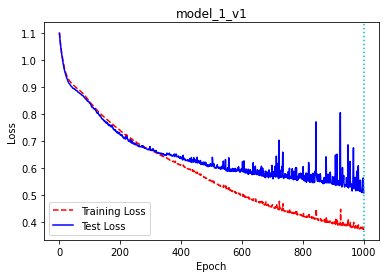

In [18]:
learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_3_v1'
model_l_v_e_filename = 'loss_vs_epochs_images/model_3_v1_le.png'
model_l_v_e_title = 'model_1_v1'
model_history_filename = 'history/history_model_3_v1'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 1000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [19]:
best_m3_v1 = load_model(model_filename)
evaluate_model(best_m3_v1, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7824

Test accuracy: 78.2%, test loss: 0.508156


In [20]:
output_filename_test_ds_labeled = 'kaggle_csv/test-ds-m3_v1.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    Our first version gives us regular results, with 78% in test accuracy and 0.51 for test loss. We will try changing the units in hidden layers:
   ##### MODEL 3: V2:  Changing Dense layers units
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = SGD
    Hidden layers:
        1. units = 128, activation = relu
        2. units = 64, activation = relu
        3. units = 16, activation = relu

Epoch 1/1000

Epoch 1: val_loss improved from inf to 1.03574, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 1.1008 - accuracy: 0.4877 - val_loss: 1.0357 - val_accuracy: 0.5751 - 1s/epoch - 88ms/step
Epoch 2/1000

Epoch 2: val_loss improved from 1.03574 to 0.99576, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 1.0424 - accuracy: 0.5162 - val_loss: 0.9958 - val_accuracy: 0.5544 - 569ms/epoch - 44ms/step
Epoch 3/1000

Epoch 3: val_loss improved from 0.99576 to 0.97135, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.9990 - accuracy: 0.4955 - val_loss: 0.9714 - val_accuracy: 0.5596 - 687ms/epoch - 53ms/step
Epoch 4/1000

Epoch 4: val_loss improved from 0.97135 to 0.95338, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.9730 - 


Epoch 32: val_loss improved from 0.82381 to 0.82347, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.8250 - accuracy: 0.6407 - val_loss: 0.8235 - val_accuracy: 0.6891 - 566ms/epoch - 44ms/step
Epoch 33/1000

Epoch 33: val_loss improved from 0.82347 to 0.81651, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.8228 - accuracy: 0.6407 - val_loss: 0.8165 - val_accuracy: 0.6891 - 620ms/epoch - 48ms/step
Epoch 34/1000

Epoch 34: val_loss improved from 0.81651 to 0.81564, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.8198 - accuracy: 0.6316 - val_loss: 0.8156 - val_accuracy: 0.6839 - 652ms/epoch - 50ms/step
Epoch 35/1000

Epoch 35: val_loss improved from 0.81564 to 0.81399, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.8169 -

Epoch 65/1000

Epoch 65: val_loss improved from 0.73759 to 0.73483, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.7509 - accuracy: 0.6783 - val_loss: 0.7348 - val_accuracy: 0.7047 - 641ms/epoch - 49ms/step
Epoch 66/1000

Epoch 66: val_loss did not improve from 0.73483
13/13 - 0s - loss: 0.7486 - accuracy: 0.6744 - val_loss: 0.7414 - val_accuracy: 0.6995 - 53ms/epoch - 4ms/step
Epoch 67/1000

Epoch 67: val_loss did not improve from 0.73483
13/13 - 0s - loss: 0.7462 - accuracy: 0.6796 - val_loss: 0.7431 - val_accuracy: 0.6891 - 48ms/epoch - 4ms/step
Epoch 68/1000

Epoch 68: val_loss did not improve from 0.73483
13/13 - 0s - loss: 0.7452 - accuracy: 0.6706 - val_loss: 0.7415 - val_accuracy: 0.6943 - 53ms/epoch - 4ms/step
Epoch 69/1000

Epoch 69: val_loss did not improve from 0.73483
13/13 - 0s - loss: 0.7430 - accuracy: 0.6706 - val_loss: 0.7419 - val_accuracy: 0.6943 - 72ms/epoch - 6ms/step
Epoch 70/1000

Epoch 70: val_

13/13 - 1s - loss: 0.6875 - accuracy: 0.6952 - val_loss: 0.6794 - val_accuracy: 0.7254 - 641ms/epoch - 49ms/step
Epoch 104/1000

Epoch 104: val_loss did not improve from 0.67937
13/13 - 0s - loss: 0.6853 - accuracy: 0.7095 - val_loss: 0.6814 - val_accuracy: 0.7254 - 53ms/epoch - 4ms/step
Epoch 105/1000

Epoch 105: val_loss improved from 0.67937 to 0.67901, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.6838 - accuracy: 0.7043 - val_loss: 0.6790 - val_accuracy: 0.7254 - 991ms/epoch - 76ms/step
Epoch 106/1000

Epoch 106: val_loss improved from 0.67901 to 0.67884, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.6826 - accuracy: 0.7043 - val_loss: 0.6788 - val_accuracy: 0.7254 - 763ms/epoch - 59ms/step
Epoch 107/1000

Epoch 107: val_loss improved from 0.67884 to 0.67455, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\

Epoch 139/1000

Epoch 139: val_loss improved from 0.63869 to 0.63667, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.6400 - accuracy: 0.7211 - val_loss: 0.6367 - val_accuracy: 0.7254 - 623ms/epoch - 48ms/step
Epoch 140/1000

Epoch 140: val_loss did not improve from 0.63667
13/13 - 0s - loss: 0.6398 - accuracy: 0.7147 - val_loss: 0.6371 - val_accuracy: 0.7254 - 50ms/epoch - 4ms/step
Epoch 141/1000

Epoch 141: val_loss improved from 0.63667 to 0.63658, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.6374 - accuracy: 0.7185 - val_loss: 0.6366 - val_accuracy: 0.7254 - 960ms/epoch - 74ms/step
Epoch 142/1000

Epoch 142: val_loss did not improve from 0.63658
13/13 - 0s - loss: 0.6358 - accuracy: 0.7185 - val_loss: 0.6404 - val_accuracy: 0.7409 - 55ms/epoch - 4ms/step
Epoch 143/1000

Epoch 143: val_loss improved from 0.63658 to 0.63354, saving model to models\m

Epoch 177/1000

Epoch 177: val_loss did not improve from 0.61217
13/13 - 0s - loss: 0.5980 - accuracy: 0.7160 - val_loss: 0.6123 - val_accuracy: 0.7358 - 60ms/epoch - 5ms/step
Epoch 178/1000

Epoch 178: val_loss improved from 0.61217 to 0.61057, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.5939 - accuracy: 0.7354 - val_loss: 0.6106 - val_accuracy: 0.7254 - 656ms/epoch - 50ms/step
Epoch 179/1000

Epoch 179: val_loss did not improve from 0.61057
13/13 - 0s - loss: 0.5928 - accuracy: 0.7341 - val_loss: 0.6130 - val_accuracy: 0.7461 - 62ms/epoch - 5ms/step
Epoch 180/1000

Epoch 180: val_loss improved from 0.61057 to 0.60907, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.5917 - accuracy: 0.7328 - val_loss: 0.6091 - val_accuracy: 0.7358 - 775ms/epoch - 60ms/step
Epoch 181/1000

Epoch 181: val_loss did not improve from 0.60907
13/13 - 0s - loss: 0.5914 - a

13/13 - 0s - loss: 0.5512 - accuracy: 0.7562 - val_loss: 0.5974 - val_accuracy: 0.7617 - 49ms/epoch - 4ms/step
Epoch 217/1000

Epoch 217: val_loss did not improve from 0.58878
13/13 - 0s - loss: 0.5510 - accuracy: 0.7678 - val_loss: 0.5892 - val_accuracy: 0.7565 - 49ms/epoch - 4ms/step
Epoch 218/1000

Epoch 218: val_loss improved from 0.58878 to 0.58772, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.5528 - accuracy: 0.7510 - val_loss: 0.5877 - val_accuracy: 0.7565 - 684ms/epoch - 53ms/step
Epoch 219/1000

Epoch 219: val_loss did not improve from 0.58772
13/13 - 0s - loss: 0.5500 - accuracy: 0.7626 - val_loss: 0.5933 - val_accuracy: 0.7668 - 48ms/epoch - 4ms/step
Epoch 220/1000

Epoch 220: val_loss did not improve from 0.58772
13/13 - 0s - loss: 0.5479 - accuracy: 0.7691 - val_loss: 0.5907 - val_accuracy: 0.7720 - 60ms/epoch - 5ms/step
Epoch 221/1000

Epoch 221: val_loss did not improve from 0.58772
13/13 - 0s - loss: 

13/13 - 0s - loss: 0.5103 - accuracy: 0.8029 - val_loss: 0.5760 - val_accuracy: 0.7668 - 64ms/epoch - 5ms/step
Epoch 259/1000

Epoch 259: val_loss did not improve from 0.57368
13/13 - 0s - loss: 0.5087 - accuracy: 0.8093 - val_loss: 0.5792 - val_accuracy: 0.7668 - 49ms/epoch - 4ms/step
Epoch 260/1000

Epoch 260: val_loss did not improve from 0.57368
13/13 - 0s - loss: 0.5076 - accuracy: 0.8132 - val_loss: 0.5813 - val_accuracy: 0.7668 - 47ms/epoch - 4ms/step
Epoch 261/1000

Epoch 261: val_loss did not improve from 0.57368
13/13 - 0s - loss: 0.5085 - accuracy: 0.8132 - val_loss: 0.5832 - val_accuracy: 0.7668 - 44ms/epoch - 3ms/step
Epoch 262/1000

Epoch 262: val_loss improved from 0.57368 to 0.57211, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.5075 - accuracy: 0.8093 - val_loss: 0.5721 - val_accuracy: 0.7565 - 612ms/epoch - 47ms/step
Epoch 263/1000

Epoch 263: val_loss improved from 0.57211 to 0.57198, saving model t

13/13 - 0s - loss: 0.4843 - accuracy: 0.8106 - val_loss: 0.5641 - val_accuracy: 0.7617 - 65ms/epoch - 5ms/step
Epoch 300/1000

Epoch 300: val_loss did not improve from 0.56025
13/13 - 0s - loss: 0.4746 - accuracy: 0.8288 - val_loss: 0.5607 - val_accuracy: 0.7720 - 53ms/epoch - 4ms/step
Epoch 301/1000

Epoch 301: val_loss did not improve from 0.56025
13/13 - 0s - loss: 0.4733 - accuracy: 0.8197 - val_loss: 0.5618 - val_accuracy: 0.7565 - 62ms/epoch - 5ms/step
Epoch 302/1000

Epoch 302: val_loss did not improve from 0.56025
13/13 - 0s - loss: 0.4714 - accuracy: 0.8210 - val_loss: 0.5808 - val_accuracy: 0.7565 - 75ms/epoch - 6ms/step
Epoch 303/1000

Epoch 303: val_loss did not improve from 0.56025
13/13 - 0s - loss: 0.4717 - accuracy: 0.8262 - val_loss: 0.5724 - val_accuracy: 0.7565 - 68ms/epoch - 5ms/step
Epoch 304/1000

Epoch 304: val_loss did not improve from 0.56025
13/13 - 0s - loss: 0.4711 - accuracy: 0.8223 - val_loss: 0.5920 - val_accuracy: 0.7461 - 64ms/epoch - 5ms/step
Epoch 305

Epoch 344/1000

Epoch 344: val_loss did not improve from 0.54957
13/13 - 0s - loss: 0.4389 - accuracy: 0.8521 - val_loss: 0.5591 - val_accuracy: 0.7876 - 56ms/epoch - 4ms/step
Epoch 345/1000

Epoch 345: val_loss did not improve from 0.54957
13/13 - 0s - loss: 0.4408 - accuracy: 0.8353 - val_loss: 0.5507 - val_accuracy: 0.7720 - 53ms/epoch - 4ms/step
Epoch 346/1000

Epoch 346: val_loss did not improve from 0.54957
13/13 - 0s - loss: 0.4373 - accuracy: 0.8444 - val_loss: 0.5988 - val_accuracy: 0.7306 - 67ms/epoch - 5ms/step
Epoch 347/1000

Epoch 347: val_loss improved from 0.54957 to 0.54701, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.4438 - accuracy: 0.8457 - val_loss: 0.5470 - val_accuracy: 0.8031 - 632ms/epoch - 49ms/step
Epoch 348/1000

Epoch 348: val_loss did not improve from 0.54701
13/13 - 0s - loss: 0.4399 - accuracy: 0.8482 - val_loss: 0.5534 - val_accuracy: 0.7772 - 49ms/epoch - 4ms/step
Epoch 349/1000

Epo

13/13 - 0s - loss: 0.4115 - accuracy: 0.8470 - val_loss: 0.5350 - val_accuracy: 0.8031 - 51ms/epoch - 4ms/step
Epoch 385/1000

Epoch 385: val_loss did not improve from 0.53440
13/13 - 0s - loss: 0.4103 - accuracy: 0.8534 - val_loss: 0.5431 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 386/1000

Epoch 386: val_loss improved from 0.53440 to 0.53297, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 0s - loss: 0.4158 - accuracy: 0.8431 - val_loss: 0.5330 - val_accuracy: 0.7772 - 391ms/epoch - 30ms/step
Epoch 387/1000

Epoch 387: val_loss did not improve from 0.53297
13/13 - 0s - loss: 0.4082 - accuracy: 0.8508 - val_loss: 0.5474 - val_accuracy: 0.7824 - 44ms/epoch - 3ms/step
Epoch 388/1000

Epoch 388: val_loss did not improve from 0.53297
13/13 - 0s - loss: 0.4096 - accuracy: 0.8534 - val_loss: 0.5372 - val_accuracy: 0.7927 - 43ms/epoch - 3ms/step
Epoch 389/1000

Epoch 389: val_loss did not improve from 0.53297
13/13 - 0s - loss: 

Epoch 427/1000

Epoch 427: val_loss did not improve from 0.52133
13/13 - 0s - loss: 0.3886 - accuracy: 0.8638 - val_loss: 0.5215 - val_accuracy: 0.7979 - 66ms/epoch - 5ms/step
Epoch 428/1000

Epoch 428: val_loss did not improve from 0.52133
13/13 - 0s - loss: 0.3835 - accuracy: 0.8547 - val_loss: 0.5270 - val_accuracy: 0.7927 - 59ms/epoch - 5ms/step
Epoch 429/1000

Epoch 429: val_loss did not improve from 0.52133
13/13 - 0s - loss: 0.3845 - accuracy: 0.8612 - val_loss: 0.5302 - val_accuracy: 0.8031 - 71ms/epoch - 5ms/step
Epoch 430/1000

Epoch 430: val_loss did not improve from 0.52133
13/13 - 0s - loss: 0.3825 - accuracy: 0.8638 - val_loss: 0.5356 - val_accuracy: 0.7824 - 59ms/epoch - 5ms/step
Epoch 431/1000

Epoch 431: val_loss did not improve from 0.52133
13/13 - 0s - loss: 0.3824 - accuracy: 0.8560 - val_loss: 0.5939 - val_accuracy: 0.7254 - 55ms/epoch - 4ms/step
Epoch 432/1000

Epoch 432: val_loss did not improve from 0.52133
13/13 - 0s - loss: 0.3917 - accuracy: 0.8521 - val_loss

Epoch 473/1000

Epoch 473: val_loss did not improve from 0.51290
13/13 - 0s - loss: 0.3637 - accuracy: 0.8560 - val_loss: 0.5234 - val_accuracy: 0.7876 - 68ms/epoch - 5ms/step
Epoch 474/1000

Epoch 474: val_loss did not improve from 0.51290
13/13 - 0s - loss: 0.3627 - accuracy: 0.8599 - val_loss: 0.5243 - val_accuracy: 0.7876 - 59ms/epoch - 5ms/step
Epoch 475/1000

Epoch 475: val_loss improved from 0.51290 to 0.51218, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.3619 - accuracy: 0.8612 - val_loss: 0.5122 - val_accuracy: 0.7927 - 568ms/epoch - 44ms/step
Epoch 476/1000

Epoch 476: val_loss did not improve from 0.51218
13/13 - 0s - loss: 0.3597 - accuracy: 0.8560 - val_loss: 0.5387 - val_accuracy: 0.7927 - 55ms/epoch - 4ms/step
Epoch 477/1000

Epoch 477: val_loss did not improve from 0.51218
13/13 - 0s - loss: 0.3596 - accuracy: 0.8651 - val_loss: 0.5165 - val_accuracy: 0.7876 - 69ms/epoch - 5ms/step
Epoch 478/1000

Epo

13/13 - 0s - loss: 0.3407 - accuracy: 0.8677 - val_loss: 0.5073 - val_accuracy: 0.8031 - 45ms/epoch - 3ms/step
Epoch 518/1000

Epoch 518: val_loss did not improve from 0.50525
13/13 - 0s - loss: 0.3395 - accuracy: 0.8664 - val_loss: 0.5093 - val_accuracy: 0.7927 - 43ms/epoch - 3ms/step
Epoch 519/1000

Epoch 519: val_loss improved from 0.50525 to 0.50372, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.3393 - accuracy: 0.8625 - val_loss: 0.5037 - val_accuracy: 0.8083 - 687ms/epoch - 53ms/step
Epoch 520/1000

Epoch 520: val_loss did not improve from 0.50372
13/13 - 0s - loss: 0.3372 - accuracy: 0.8690 - val_loss: 0.5172 - val_accuracy: 0.8083 - 71ms/epoch - 5ms/step
Epoch 521/1000

Epoch 521: val_loss did not improve from 0.50372
13/13 - 0s - loss: 0.3414 - accuracy: 0.8638 - val_loss: 0.5074 - val_accuracy: 0.7876 - 53ms/epoch - 4ms/step
Epoch 522/1000

Epoch 522: val_loss did not improve from 0.50372
13/13 - 0s - loss: 

Epoch 560/1000

Epoch 560: val_loss did not improve from 0.49287
13/13 - 0s - loss: 0.3207 - accuracy: 0.8664 - val_loss: 0.5331 - val_accuracy: 0.7772 - 59ms/epoch - 5ms/step
Epoch 561/1000

Epoch 561: val_loss did not improve from 0.49287
13/13 - 0s - loss: 0.3250 - accuracy: 0.8690 - val_loss: 0.5005 - val_accuracy: 0.7927 - 71ms/epoch - 5ms/step
Epoch 562/1000

Epoch 562: val_loss did not improve from 0.49287
13/13 - 0s - loss: 0.3252 - accuracy: 0.8638 - val_loss: 0.4994 - val_accuracy: 0.7876 - 63ms/epoch - 5ms/step
Epoch 563/1000

Epoch 563: val_loss did not improve from 0.49287
13/13 - 0s - loss: 0.3206 - accuracy: 0.8690 - val_loss: 0.4962 - val_accuracy: 0.8083 - 86ms/epoch - 7ms/step
Epoch 564/1000

Epoch 564: val_loss improved from 0.49287 to 0.49253, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.3201 - accuracy: 0.8768 - val_loss: 0.4925 - val_accuracy: 0.8031 - 950ms/epoch - 73ms/step
Epoch 565/1000

Epo

Epoch 605/1000

Epoch 605: val_loss did not improve from 0.48307
13/13 - 0s - loss: 0.3102 - accuracy: 0.8729 - val_loss: 0.5519 - val_accuracy: 0.7772 - 54ms/epoch - 4ms/step
Epoch 606/1000

Epoch 606: val_loss did not improve from 0.48307
13/13 - 0s - loss: 0.3153 - accuracy: 0.8638 - val_loss: 0.5092 - val_accuracy: 0.8031 - 56ms/epoch - 4ms/step
Epoch 607/1000

Epoch 607: val_loss did not improve from 0.48307
13/13 - 0s - loss: 0.3074 - accuracy: 0.8729 - val_loss: 0.8679 - val_accuracy: 0.6632 - 46ms/epoch - 4ms/step
Epoch 608/1000

Epoch 608: val_loss did not improve from 0.48307
13/13 - 0s - loss: 0.3340 - accuracy: 0.8638 - val_loss: 0.5462 - val_accuracy: 0.7720 - 59ms/epoch - 5ms/step
Epoch 609/1000

Epoch 609: val_loss did not improve from 0.48307
13/13 - 0s - loss: 0.3189 - accuracy: 0.8716 - val_loss: 0.5401 - val_accuracy: 0.7617 - 58ms/epoch - 4ms/step
Epoch 610/1000

Epoch 610: val_loss did not improve from 0.48307
13/13 - 0s - loss: 0.3097 - accuracy: 0.8755 - val_loss

13/13 - 0s - loss: 0.2915 - accuracy: 0.8820 - val_loss: 0.5521 - val_accuracy: 0.7876 - 61ms/epoch - 5ms/step
Epoch 649/1000

Epoch 649: val_loss did not improve from 0.47172
13/13 - 0s - loss: 0.3079 - accuracy: 0.8664 - val_loss: 0.4736 - val_accuracy: 0.8135 - 63ms/epoch - 5ms/step
Epoch 650/1000

Epoch 650: val_loss did not improve from 0.47172
13/13 - 0s - loss: 0.2951 - accuracy: 0.8820 - val_loss: 0.4850 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 651/1000

Epoch 651: val_loss improved from 0.47172 to 0.46552, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.2943 - accuracy: 0.8794 - val_loss: 0.4655 - val_accuracy: 0.8083 - 863ms/epoch - 66ms/step
Epoch 652/1000

Epoch 652: val_loss did not improve from 0.46552
13/13 - 0s - loss: 0.2905 - accuracy: 0.8833 - val_loss: 0.4785 - val_accuracy: 0.7772 - 66ms/epoch - 5ms/step
Epoch 653/1000

Epoch 653: val_loss did not improve from 0.46552
13/13 - 0s - loss: 

Epoch 694/1000

Epoch 694: val_loss did not improve from 0.46531
13/13 - 0s - loss: 0.2789 - accuracy: 0.8949 - val_loss: 0.4716 - val_accuracy: 0.8135 - 47ms/epoch - 4ms/step
Epoch 695/1000

Epoch 695: val_loss did not improve from 0.46531
13/13 - 0s - loss: 0.2801 - accuracy: 0.8988 - val_loss: 0.5120 - val_accuracy: 0.7927 - 58ms/epoch - 4ms/step
Epoch 696/1000

Epoch 696: val_loss did not improve from 0.46531
13/13 - 0s - loss: 0.2876 - accuracy: 0.8872 - val_loss: 0.6810 - val_accuracy: 0.7617 - 67ms/epoch - 5ms/step
Epoch 697/1000

Epoch 697: val_loss did not improve from 0.46531
13/13 - 0s - loss: 0.3203 - accuracy: 0.8716 - val_loss: 0.5007 - val_accuracy: 0.8083 - 67ms/epoch - 5ms/step
Epoch 698/1000

Epoch 698: val_loss did not improve from 0.46531
13/13 - 0s - loss: 0.2808 - accuracy: 0.8820 - val_loss: 0.5110 - val_accuracy: 0.8083 - 64ms/epoch - 5ms/step
Epoch 699/1000

Epoch 699: val_loss did not improve from 0.46531
13/13 - 0s - loss: 0.2909 - accuracy: 0.8833 - val_loss

Epoch 740/1000

Epoch 740: val_loss did not improve from 0.45513
13/13 - 0s - loss: 0.2679 - accuracy: 0.8988 - val_loss: 0.4554 - val_accuracy: 0.8238 - 56ms/epoch - 4ms/step
Epoch 741/1000

Epoch 741: val_loss did not improve from 0.45513
13/13 - 0s - loss: 0.2684 - accuracy: 0.8975 - val_loss: 0.4607 - val_accuracy: 0.8187 - 52ms/epoch - 4ms/step
Epoch 742/1000

Epoch 742: val_loss did not improve from 0.45513
13/13 - 0s - loss: 0.2664 - accuracy: 0.9040 - val_loss: 0.4592 - val_accuracy: 0.8187 - 57ms/epoch - 4ms/step
Epoch 743/1000

Epoch 743: val_loss did not improve from 0.45513
13/13 - 0s - loss: 0.2684 - accuracy: 0.8962 - val_loss: 0.4774 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 744/1000

Epoch 744: val_loss did not improve from 0.45513
13/13 - 0s - loss: 0.2711 - accuracy: 0.8975 - val_loss: 0.4638 - val_accuracy: 0.8238 - 43ms/epoch - 3ms/step
Epoch 745/1000

Epoch 745: val_loss improved from 0.45513 to 0.45437, saving model to models\model_3_v2
INFO:tensorflow:

Epoch 784/1000

Epoch 784: val_loss did not improve from 0.44019
13/13 - 0s - loss: 0.2619 - accuracy: 0.8923 - val_loss: 0.4894 - val_accuracy: 0.8238 - 68ms/epoch - 5ms/step
Epoch 785/1000

Epoch 785: val_loss did not improve from 0.44019
13/13 - 0s - loss: 0.2634 - accuracy: 0.8988 - val_loss: 0.4459 - val_accuracy: 0.8290 - 65ms/epoch - 5ms/step
Epoch 786/1000

Epoch 786: val_loss did not improve from 0.44019
13/13 - 0s - loss: 0.2661 - accuracy: 0.8975 - val_loss: 0.4552 - val_accuracy: 0.8135 - 68ms/epoch - 5ms/step
Epoch 787/1000

Epoch 787: val_loss did not improve from 0.44019
13/13 - 0s - loss: 0.2606 - accuracy: 0.8975 - val_loss: 0.4509 - val_accuracy: 0.8187 - 74ms/epoch - 6ms/step
Epoch 788/1000

Epoch 788: val_loss did not improve from 0.44019
13/13 - 0s - loss: 0.2572 - accuracy: 0.9014 - val_loss: 0.4809 - val_accuracy: 0.8031 - 53ms/epoch - 4ms/step
Epoch 789/1000

Epoch 789: val_loss did not improve from 0.44019
13/13 - 0s - loss: 0.2665 - accuracy: 0.8911 - val_loss

Epoch 831/1000

Epoch 831: val_loss did not improve from 0.44019
13/13 - 0s - loss: 0.2523 - accuracy: 0.8962 - val_loss: 0.4526 - val_accuracy: 0.8187 - 60ms/epoch - 5ms/step
Epoch 832/1000

Epoch 832: val_loss improved from 0.44019 to 0.44013, saving model to models\model_3_v2
INFO:tensorflow:Assets written to: models\model_3_v2\assets
13/13 - 1s - loss: 0.2524 - accuracy: 0.9014 - val_loss: 0.4401 - val_accuracy: 0.8187 - 848ms/epoch - 65ms/step
Epoch 833/1000

Epoch 833: val_loss did not improve from 0.44013
13/13 - 0s - loss: 0.2531 - accuracy: 0.8975 - val_loss: 0.4573 - val_accuracy: 0.8187 - 61ms/epoch - 5ms/step
Epoch 834/1000

Epoch 834: val_loss did not improve from 0.44013
13/13 - 0s - loss: 0.2501 - accuracy: 0.9001 - val_loss: 0.4611 - val_accuracy: 0.8135 - 56ms/epoch - 4ms/step
Epoch 835/1000

Epoch 835: val_loss did not improve from 0.44013
13/13 - 0s - loss: 0.2492 - accuracy: 0.8923 - val_loss: 0.5469 - val_accuracy: 0.7876 - 42ms/epoch - 3ms/step
Epoch 836/1000

Epo

Epoch 877/1000

Epoch 877: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2470 - accuracy: 0.8962 - val_loss: 0.4561 - val_accuracy: 0.8135 - 57ms/epoch - 4ms/step
Epoch 878/1000

Epoch 878: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2474 - accuracy: 0.8962 - val_loss: 0.4778 - val_accuracy: 0.8031 - 69ms/epoch - 5ms/step
Epoch 879/1000

Epoch 879: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2566 - accuracy: 0.8936 - val_loss: 0.4698 - val_accuracy: 0.7824 - 68ms/epoch - 5ms/step
Epoch 880/1000

Epoch 880: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2507 - accuracy: 0.9014 - val_loss: 0.7236 - val_accuracy: 0.7306 - 64ms/epoch - 5ms/step
Epoch 881/1000

Epoch 881: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2675 - accuracy: 0.8898 - val_loss: 0.5228 - val_accuracy: 0.7979 - 68ms/epoch - 5ms/step
Epoch 882/1000

Epoch 882: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2653 - accuracy: 0.8859 - val_loss

Epoch 924/1000

Epoch 924: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2446 - accuracy: 0.9001 - val_loss: 0.4437 - val_accuracy: 0.8135 - 66ms/epoch - 5ms/step
Epoch 925/1000

Epoch 925: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2406 - accuracy: 0.9014 - val_loss: 0.4734 - val_accuracy: 0.7876 - 62ms/epoch - 5ms/step
Epoch 926/1000

Epoch 926: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2480 - accuracy: 0.8975 - val_loss: 0.4522 - val_accuracy: 0.8238 - 68ms/epoch - 5ms/step
Epoch 927/1000

Epoch 927: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2401 - accuracy: 0.9014 - val_loss: 0.4690 - val_accuracy: 0.8238 - 66ms/epoch - 5ms/step
Epoch 928/1000

Epoch 928: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2426 - accuracy: 0.8962 - val_loss: 0.4488 - val_accuracy: 0.8238 - 56ms/epoch - 4ms/step
Epoch 929/1000

Epoch 929: val_loss did not improve from 0.43848
13/13 - 0s - loss: 0.2392 - accuracy: 0.9014 - val_loss

Epoch 970/1000

Epoch 970: val_loss did not improve from 0.43087
13/13 - 0s - loss: 0.2385 - accuracy: 0.8962 - val_loss: 0.4588 - val_accuracy: 0.8135 - 65ms/epoch - 5ms/step
Epoch 971/1000

Epoch 971: val_loss did not improve from 0.43087
13/13 - 0s - loss: 0.2390 - accuracy: 0.9014 - val_loss: 0.4475 - val_accuracy: 0.8031 - 70ms/epoch - 5ms/step
Epoch 972/1000

Epoch 972: val_loss did not improve from 0.43087
13/13 - 0s - loss: 0.2381 - accuracy: 0.8988 - val_loss: 0.5697 - val_accuracy: 0.7720 - 57ms/epoch - 4ms/step
Epoch 973/1000

Epoch 973: val_loss did not improve from 0.43087
13/13 - 0s - loss: 0.2690 - accuracy: 0.8690 - val_loss: 0.4517 - val_accuracy: 0.7979 - 66ms/epoch - 5ms/step
Epoch 974/1000

Epoch 974: val_loss did not improve from 0.43087
13/13 - 0s - loss: 0.2425 - accuracy: 0.8962 - val_loss: 0.4435 - val_accuracy: 0.8031 - 51ms/epoch - 4ms/step
Epoch 975/1000

Epoch 975: val_loss did not improve from 0.43087
13/13 - 0s - loss: 0.2376 - accuracy: 0.8923 - val_loss

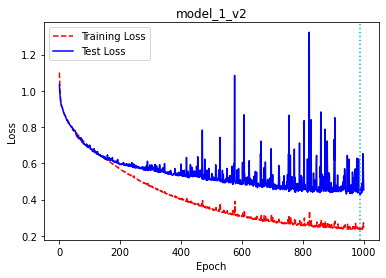

In [21]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_3_v2'
model_l_v_e_filename = 'loss_vs_epochs_images/model_3_v2_le.png'
model_l_v_e_title = 'model_1_v2'
model_history_filename = 'history/history_model_3_v2'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 1000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [22]:
best_m3_v2 = load_model(model_filename)
evaluate_model(best_m3_v2, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8238

Test accuracy: 82.4%, test loss: 0.426403


In [23]:
output_filename_test_ds_labeled = 'kaggle_csv/test-ds-m3_v2.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    The new unit numbers we tried for the hidden layers increased accuracy to 82.4% and improved test loss to 0.426.
    Now we will try the same configuration as V2, but with Adam optimizer:
   ##### MODEL 3: V3:  Changing Dense layers units
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 128, activation = relu
        2. units = 64, activation = relu
        3. units = 16, activation = relu

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.74313, saving model to models\model_3_v3
INFO:tensorflow:Assets written to: models\model_3_v3\assets
13/13 - 2s - loss: 0.9103 - accuracy: 0.5863 - val_loss: 0.7431 - val_accuracy: 0.6684 - 2s/epoch - 149ms/step
Epoch 2/300

Epoch 2: val_loss improved from 0.74313 to 0.66145, saving model to models\model_3_v3
INFO:tensorflow:Assets written to: models\model_3_v3\assets
13/13 - 1s - loss: 0.7754 - accuracy: 0.6446 - val_loss: 0.6615 - val_accuracy: 0.6995 - 787ms/epoch - 61ms/step
Epoch 3/300

Epoch 3: val_loss improved from 0.66145 to 0.60040, saving model to models\model_3_v3
INFO:tensorflow:Assets written to: models\model_3_v3\assets
13/13 - 1s - loss: 0.6736 - accuracy: 0.6913 - val_loss: 0.6004 - val_accuracy: 0.7306 - 728ms/epoch - 56ms/step
Epoch 4/300

Epoch 4: val_loss improved from 0.60040 to 0.56439, saving model to models\model_3_v3
INFO:tensorflow:Assets written to: models\model_3_v3\assets
13/13 - 1s - loss: 0.6038 - acc

13/13 - 0s - loss: 0.2278 - accuracy: 0.8962 - val_loss: 0.3997 - val_accuracy: 0.8290 - 51ms/epoch - 4ms/step
Epoch 43/300

Epoch 43: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2301 - accuracy: 0.8988 - val_loss: 0.4314 - val_accuracy: 0.8135 - 60ms/epoch - 5ms/step
Epoch 44/300

Epoch 44: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2216 - accuracy: 0.8988 - val_loss: 0.4291 - val_accuracy: 0.8238 - 63ms/epoch - 5ms/step
Epoch 45/300

Epoch 45: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2361 - accuracy: 0.8911 - val_loss: 0.4401 - val_accuracy: 0.8290 - 59ms/epoch - 5ms/step
Epoch 46/300

Epoch 46: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2301 - accuracy: 0.9001 - val_loss: 0.4601 - val_accuracy: 0.8342 - 52ms/epoch - 4ms/step
Epoch 47/300

Epoch 47: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2266 - accuracy: 0.8988 - val_loss: 0.4440 - val_accuracy: 0.8290 - 65ms/epoch - 5ms/step
Epoch 48/300

Epoch 48: 

Epoch 90/300

Epoch 90: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2102 - accuracy: 0.9014 - val_loss: 0.4544 - val_accuracy: 0.8290 - 63ms/epoch - 5ms/step
Epoch 91/300

Epoch 91: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2099 - accuracy: 0.9001 - val_loss: 0.4495 - val_accuracy: 0.8238 - 68ms/epoch - 5ms/step
Epoch 92/300

Epoch 92: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2129 - accuracy: 0.9001 - val_loss: 0.4592 - val_accuracy: 0.8187 - 71ms/epoch - 5ms/step
Epoch 93/300

Epoch 93: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2092 - accuracy: 0.8988 - val_loss: 0.4586 - val_accuracy: 0.8290 - 69ms/epoch - 5ms/step
Epoch 94/300

Epoch 94: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2084 - accuracy: 0.9014 - val_loss: 0.4481 - val_accuracy: 0.8187 - 59ms/epoch - 5ms/step
Epoch 95/300

Epoch 95: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2099 - accuracy: 0.8988 - val_loss: 0.4664 - val_acc

Epoch 137/300

Epoch 137: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2090 - accuracy: 0.9027 - val_loss: 0.4761 - val_accuracy: 0.8187 - 48ms/epoch - 4ms/step
Epoch 138/300

Epoch 138: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2067 - accuracy: 0.9014 - val_loss: 0.4651 - val_accuracy: 0.8187 - 57ms/epoch - 4ms/step
Epoch 139/300

Epoch 139: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2077 - accuracy: 0.9014 - val_loss: 0.4795 - val_accuracy: 0.8135 - 49ms/epoch - 4ms/step
Epoch 140/300

Epoch 140: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2110 - accuracy: 0.8988 - val_loss: 0.4708 - val_accuracy: 0.8238 - 54ms/epoch - 4ms/step
Epoch 141/300

Epoch 141: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2070 - accuracy: 0.8988 - val_loss: 0.4754 - val_accuracy: 0.8187 - 48ms/epoch - 4ms/step
Epoch 142/300

Epoch 142: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2056 - accuracy: 0.8962 - val_loss: 0.47

Epoch 184/300

Epoch 184: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2577 - accuracy: 0.8807 - val_loss: 0.4842 - val_accuracy: 0.8031 - 62ms/epoch - 5ms/step
Epoch 185/300

Epoch 185: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2694 - accuracy: 0.8807 - val_loss: 0.4920 - val_accuracy: 0.8290 - 58ms/epoch - 4ms/step
Epoch 186/300

Epoch 186: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2354 - accuracy: 0.8962 - val_loss: 0.4858 - val_accuracy: 0.8290 - 52ms/epoch - 4ms/step
Epoch 187/300

Epoch 187: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2265 - accuracy: 0.8949 - val_loss: 0.4682 - val_accuracy: 0.8290 - 48ms/epoch - 4ms/step
Epoch 188/300

Epoch 188: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2132 - accuracy: 0.9001 - val_loss: 0.4310 - val_accuracy: 0.8135 - 68ms/epoch - 5ms/step
Epoch 189/300

Epoch 189: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2147 - accuracy: 0.8936 - val_loss: 0.44

Epoch 231/300

Epoch 231: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2064 - accuracy: 0.9027 - val_loss: 0.5149 - val_accuracy: 0.8187 - 59ms/epoch - 5ms/step
Epoch 232/300

Epoch 232: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2050 - accuracy: 0.9001 - val_loss: 0.5438 - val_accuracy: 0.8187 - 54ms/epoch - 4ms/step
Epoch 233/300

Epoch 233: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2066 - accuracy: 0.8988 - val_loss: 0.5340 - val_accuracy: 0.8187 - 54ms/epoch - 4ms/step
Epoch 234/300

Epoch 234: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2109 - accuracy: 0.8988 - val_loss: 0.4906 - val_accuracy: 0.8342 - 59ms/epoch - 5ms/step
Epoch 235/300

Epoch 235: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2141 - accuracy: 0.8988 - val_loss: 0.4992 - val_accuracy: 0.8342 - 73ms/epoch - 6ms/step
Epoch 236/300

Epoch 236: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2090 - accuracy: 0.8975 - val_loss: 0.50

Epoch 278/300

Epoch 278: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2053 - accuracy: 0.8936 - val_loss: 0.5436 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 279/300

Epoch 279: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2049 - accuracy: 0.9001 - val_loss: 0.5590 - val_accuracy: 0.8187 - 57ms/epoch - 4ms/step
Epoch 280/300

Epoch 280: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2048 - accuracy: 0.9027 - val_loss: 0.5744 - val_accuracy: 0.8238 - 59ms/epoch - 5ms/step
Epoch 281/300

Epoch 281: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2064 - accuracy: 0.8988 - val_loss: 0.5787 - val_accuracy: 0.8187 - 52ms/epoch - 4ms/step
Epoch 282/300

Epoch 282: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2055 - accuracy: 0.9027 - val_loss: 0.5780 - val_accuracy: 0.8135 - 53ms/epoch - 4ms/step
Epoch 283/300

Epoch 283: val_loss did not improve from 0.39445
13/13 - 0s - loss: 0.2083 - accuracy: 0.9027 - val_loss: 0.55

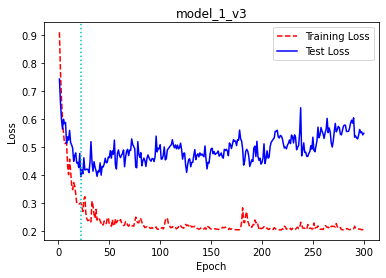

In [24]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_3_v3'
model_l_v_e_filename = 'loss_vs_epochs_images/model_3_v3_le.png'
model_l_v_e_title = 'model_1_v3'
model_history_filename = 'history/history_model_3_v3'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 300,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [25]:
best_m3_v3 = load_model(model_filename)
evaluate_model(best_m3_v3, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8342

Test accuracy: 83.4%, test loss: 0.394454


In [26]:
output_filename_test_ds_labeled = 'kaggle_csv/test-ds-m3_v3.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    With Adam optimizer, the neural network converges much faster, and we get better results, improving test accuracy to 83.4% and test loss to 0.3945.
    Now we will try changing the activation functions for the hidden layers:
   ##### MODEL 3: V4:  Changing hidden Dense layers activation fn
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 128, activation = tanh
        2. units = 64, activation = tanh
        3. units = 16, activation = tanh

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.73380, saving model to models\model_3_v4
INFO:tensorflow:Assets written to: models\model_3_v4\assets
13/13 - 1s - loss: 0.9085 - accuracy: 0.5888 - val_loss: 0.7338 - val_accuracy: 0.7098 - 1s/epoch - 113ms/step
Epoch 2/200

Epoch 2: val_loss improved from 0.73380 to 0.66533, saving model to models\model_3_v4
INFO:tensorflow:Assets written to: models\model_3_v4\assets
13/13 - 1s - loss: 0.7479 - accuracy: 0.6835 - val_loss: 0.6653 - val_accuracy: 0.6943 - 747ms/epoch - 57ms/step
Epoch 3/200

Epoch 3: val_loss improved from 0.66533 to 0.64319, saving model to models\model_3_v4
INFO:tensorflow:Assets written to: models\model_3_v4\assets
13/13 - 1s - loss: 0.7149 - accuracy: 0.7004 - val_loss: 0.6432 - val_accuracy: 0.7409 - 662ms/epoch - 51ms/step
Epoch 4/200

Epoch 4: val_loss improved from 0.64319 to 0.61027, saving model to models\model_3_v4
INFO:tensorflow:Assets written to: models\model_3_v4\assets
13/13 - 1s - loss: 0.6692 - acc

Epoch 39/200

Epoch 39: val_loss improved from 0.39824 to 0.38510, saving model to models\model_3_v4
INFO:tensorflow:Assets written to: models\model_3_v4\assets
13/13 - 1s - loss: 0.2751 - accuracy: 0.8885 - val_loss: 0.3851 - val_accuracy: 0.8290 - 842ms/epoch - 65ms/step
Epoch 40/200

Epoch 40: val_loss did not improve from 0.38510
13/13 - 0s - loss: 0.2778 - accuracy: 0.8923 - val_loss: 0.4345 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step
Epoch 41/200

Epoch 41: val_loss did not improve from 0.38510
13/13 - 0s - loss: 0.2687 - accuracy: 0.8923 - val_loss: 0.4052 - val_accuracy: 0.8342 - 46ms/epoch - 4ms/step
Epoch 42/200

Epoch 42: val_loss did not improve from 0.38510
13/13 - 0s - loss: 0.2617 - accuracy: 0.8911 - val_loss: 0.4141 - val_accuracy: 0.8238 - 55ms/epoch - 4ms/step
Epoch 43/200

Epoch 43: val_loss did not improve from 0.38510
13/13 - 0s - loss: 0.2546 - accuracy: 0.8911 - val_loss: 0.3999 - val_accuracy: 0.8290 - 57ms/epoch - 4ms/step
Epoch 44/200

Epoch 44: val_loss i

Epoch 85/200

Epoch 85: val_loss did not improve from 0.37648
13/13 - 0s - loss: 0.2239 - accuracy: 0.8988 - val_loss: 0.4111 - val_accuracy: 0.8394 - 49ms/epoch - 4ms/step
Epoch 86/200

Epoch 86: val_loss did not improve from 0.37648
13/13 - 0s - loss: 0.2321 - accuracy: 0.8962 - val_loss: 0.4110 - val_accuracy: 0.8394 - 55ms/epoch - 4ms/step
Epoch 87/200

Epoch 87: val_loss did not improve from 0.37648
13/13 - 0s - loss: 0.2296 - accuracy: 0.9001 - val_loss: 0.3890 - val_accuracy: 0.8238 - 50ms/epoch - 4ms/step
Epoch 88/200

Epoch 88: val_loss did not improve from 0.37648
13/13 - 0s - loss: 0.2343 - accuracy: 0.8923 - val_loss: 0.4220 - val_accuracy: 0.8238 - 68ms/epoch - 5ms/step
Epoch 89/200

Epoch 89: val_loss did not improve from 0.37648
13/13 - 0s - loss: 0.2293 - accuracy: 0.8936 - val_loss: 0.4093 - val_accuracy: 0.8238 - 60ms/epoch - 5ms/step
Epoch 90/200

Epoch 90: val_loss did not improve from 0.37648
13/13 - 0s - loss: 0.2345 - accuracy: 0.8949 - val_loss: 0.3829 - val_acc

Epoch 131/200

Epoch 131: val_loss did not improve from 0.37227
13/13 - 0s - loss: 0.2148 - accuracy: 0.8975 - val_loss: 0.4353 - val_accuracy: 0.8238 - 52ms/epoch - 4ms/step
Epoch 132/200

Epoch 132: val_loss did not improve from 0.37227
13/13 - 0s - loss: 0.2208 - accuracy: 0.8911 - val_loss: 0.4333 - val_accuracy: 0.8083 - 55ms/epoch - 4ms/step
Epoch 133/200

Epoch 133: val_loss did not improve from 0.37227
13/13 - 0s - loss: 0.2408 - accuracy: 0.8911 - val_loss: 0.4401 - val_accuracy: 0.8083 - 62ms/epoch - 5ms/step
Epoch 134/200

Epoch 134: val_loss did not improve from 0.37227
13/13 - 0s - loss: 0.2290 - accuracy: 0.8936 - val_loss: 0.4367 - val_accuracy: 0.8290 - 74ms/epoch - 6ms/step
Epoch 135/200

Epoch 135: val_loss did not improve from 0.37227
13/13 - 0s - loss: 0.2251 - accuracy: 0.8975 - val_loss: 0.4412 - val_accuracy: 0.8238 - 52ms/epoch - 4ms/step
Epoch 136/200

Epoch 136: val_loss did not improve from 0.37227
13/13 - 0s - loss: 0.2404 - accuracy: 0.8833 - val_loss: 0.42

13/13 - 0s - loss: 0.2068 - accuracy: 0.9014 - val_loss: 0.4126 - val_accuracy: 0.8342 - 53ms/epoch - 4ms/step
Epoch 178/200

Epoch 178: val_loss did not improve from 0.36900
13/13 - 0s - loss: 0.2054 - accuracy: 0.9001 - val_loss: 0.4106 - val_accuracy: 0.8342 - 76ms/epoch - 6ms/step
Epoch 179/200

Epoch 179: val_loss did not improve from 0.36900
13/13 - 0s - loss: 0.2069 - accuracy: 0.9014 - val_loss: 0.4114 - val_accuracy: 0.8290 - 64ms/epoch - 5ms/step
Epoch 180/200

Epoch 180: val_loss did not improve from 0.36900
13/13 - 0s - loss: 0.2062 - accuracy: 0.9001 - val_loss: 0.4112 - val_accuracy: 0.8342 - 59ms/epoch - 5ms/step
Epoch 181/200

Epoch 181: val_loss did not improve from 0.36900
13/13 - 0s - loss: 0.2069 - accuracy: 0.9027 - val_loss: 0.4146 - val_accuracy: 0.8342 - 59ms/epoch - 5ms/step
Epoch 182/200

Epoch 182: val_loss did not improve from 0.36900
13/13 - 0s - loss: 0.2072 - accuracy: 0.8936 - val_loss: 0.4169 - val_accuracy: 0.8342 - 52ms/epoch - 4ms/step
Epoch 183/200


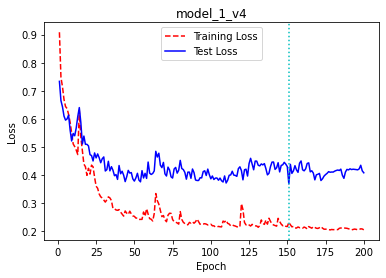

In [27]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='tanh'),
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(16, activation='tanh'),
      tf.keras.layers.Dense(3)
    ])

learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_3_v4'
model_l_v_e_filename = 'loss_vs_epochs_images/model_3_v4_le.png'
model_l_v_e_title = 'model_1_v4'
model_history_filename = 'history/history_model_3_v4'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 200,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [28]:
best_m3_v4 = load_model(model_filename)
evaluate_model(best_m3_v4, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8394

Test accuracy: 83.9%, test loss: 0.369002


In [29]:
output_filename_test_ds_labeled = 'kaggle_csv/test-ds-m3_v4.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    With tanh as activation function for the hidden layers, we got better results, improving accuracy to 83.9% and test loss to 0.3690. Now we will also try sigmoid activation:
   ##### MODEL 3: V5:  Changing hidden Dense layers activation function
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 128, activation = sigmoid
        2. units = 64, activation = sigmoid
        3. units = 16, activation = sigmoid

Epoch 1/500

Epoch 1: val_loss improved from inf to 0.91402, saving model to models\model_3_v5
INFO:tensorflow:Assets written to: models\model_3_v5\assets
13/13 - 1s - loss: 1.0238 - accuracy: 0.4008 - val_loss: 0.9140 - val_accuracy: 0.5648 - 1s/epoch - 111ms/step
Epoch 2/500

Epoch 2: val_loss did not improve from 0.91402
13/13 - 0s - loss: 0.9312 - accuracy: 0.5110 - val_loss: 0.9397 - val_accuracy: 0.5648 - 58ms/epoch - 4ms/step
Epoch 3/500

Epoch 3: val_loss did not improve from 0.91402
13/13 - 0s - loss: 0.9276 - accuracy: 0.5032 - val_loss: 0.9150 - val_accuracy: 0.5648 - 59ms/epoch - 5ms/step
Epoch 4/500

Epoch 4: val_loss improved from 0.91402 to 0.89394, saving model to models\model_3_v5
INFO:tensorflow:Assets written to: models\model_3_v5\assets
13/13 - 1s - loss: 0.9144 - accuracy: 0.5032 - val_loss: 0.8939 - val_accuracy: 0.5648 - 659ms/epoch - 51ms/step
Epoch 5/500

Epoch 5: val_loss did not improve from 0.89394
13/13 - 0s - loss: 0.9044 - accuracy: 0.5097 - val_loss: 0.9

Epoch 39/500

Epoch 39: val_loss improved from 0.62189 to 0.61659, saving model to models\model_3_v5
INFO:tensorflow:Assets written to: models\model_3_v5\assets
13/13 - 1s - loss: 0.6761 - accuracy: 0.7315 - val_loss: 0.6166 - val_accuracy: 0.7617 - 729ms/epoch - 56ms/step
Epoch 40/500

Epoch 40: val_loss did not improve from 0.61659
13/13 - 0s - loss: 0.6703 - accuracy: 0.7211 - val_loss: 0.6407 - val_accuracy: 0.7513 - 45ms/epoch - 3ms/step
Epoch 41/500

Epoch 41: val_loss did not improve from 0.61659
13/13 - 0s - loss: 0.6730 - accuracy: 0.7341 - val_loss: 0.6198 - val_accuracy: 0.7824 - 42ms/epoch - 3ms/step
Epoch 42/500

Epoch 42: val_loss did not improve from 0.61659
13/13 - 0s - loss: 0.6658 - accuracy: 0.7328 - val_loss: 0.6294 - val_accuracy: 0.7617 - 52ms/epoch - 4ms/step
Epoch 43/500

Epoch 43: val_loss improved from 0.61659 to 0.61081, saving model to models\model_3_v5
INFO:tensorflow:Assets written to: models\model_3_v5\assets
13/13 - 1s - loss: 0.6550 - accuracy: 0.7484 -

Epoch 79/500

Epoch 79: val_loss did not improve from 0.54061
13/13 - 0s - loss: 0.4372 - accuracy: 0.8340 - val_loss: 0.5551 - val_accuracy: 0.7720 - 45ms/epoch - 3ms/step
Epoch 80/500

Epoch 80: val_loss did not improve from 0.54061
13/13 - 0s - loss: 0.4579 - accuracy: 0.8301 - val_loss: 0.5602 - val_accuracy: 0.7668 - 47ms/epoch - 4ms/step
Epoch 81/500

Epoch 81: val_loss did not improve from 0.54061
13/13 - 0s - loss: 0.4630 - accuracy: 0.8080 - val_loss: 0.5721 - val_accuracy: 0.7772 - 46ms/epoch - 4ms/step
Epoch 82/500

Epoch 82: val_loss improved from 0.54061 to 0.53994, saving model to models\model_3_v5
INFO:tensorflow:Assets written to: models\model_3_v5\assets
13/13 - 1s - loss: 0.4220 - accuracy: 0.8366 - val_loss: 0.5399 - val_accuracy: 0.7876 - 714ms/epoch - 55ms/step
Epoch 83/500

Epoch 83: val_loss did not improve from 0.53994
13/13 - 0s - loss: 0.4196 - accuracy: 0.8405 - val_loss: 0.5477 - val_accuracy: 0.7927 - 47ms/epoch - 4ms/step
Epoch 84/500

Epoch 84: val_loss d

13/13 - 0s - loss: 0.3347 - accuracy: 0.8677 - val_loss: 0.4978 - val_accuracy: 0.7979 - 70ms/epoch - 5ms/step
Epoch 121/500

Epoch 121: val_loss did not improve from 0.49709
13/13 - 0s - loss: 0.3367 - accuracy: 0.8612 - val_loss: 0.5118 - val_accuracy: 0.8031 - 95ms/epoch - 7ms/step
Epoch 122/500

Epoch 122: val_loss did not improve from 0.49709
13/13 - 0s - loss: 0.3317 - accuracy: 0.8677 - val_loss: 0.5040 - val_accuracy: 0.8031 - 62ms/epoch - 5ms/step
Epoch 123/500

Epoch 123: val_loss did not improve from 0.49709
13/13 - 0s - loss: 0.3302 - accuracy: 0.8690 - val_loss: 0.5105 - val_accuracy: 0.7979 - 70ms/epoch - 5ms/step
Epoch 124/500

Epoch 124: val_loss improved from 0.49709 to 0.49126, saving model to models\model_3_v5
INFO:tensorflow:Assets written to: models\model_3_v5\assets
13/13 - 1s - loss: 0.3605 - accuracy: 0.8547 - val_loss: 0.4913 - val_accuracy: 0.8031 - 854ms/epoch - 66ms/step
Epoch 125/500

Epoch 125: val_loss did not improve from 0.49126
13/13 - 0s - loss: 0.334

Epoch 162/500

Epoch 162: val_loss did not improve from 0.43224
13/13 - 0s - loss: 0.2775 - accuracy: 0.8820 - val_loss: 0.4703 - val_accuracy: 0.8394 - 96ms/epoch - 7ms/step
Epoch 163/500

Epoch 163: val_loss did not improve from 0.43224
13/13 - 0s - loss: 0.2814 - accuracy: 0.8833 - val_loss: 0.4343 - val_accuracy: 0.8238 - 70ms/epoch - 5ms/step
Epoch 164/500

Epoch 164: val_loss did not improve from 0.43224
13/13 - 0s - loss: 0.3315 - accuracy: 0.8560 - val_loss: 0.5128 - val_accuracy: 0.8238 - 69ms/epoch - 5ms/step
Epoch 165/500

Epoch 165: val_loss did not improve from 0.43224
13/13 - 0s - loss: 0.3186 - accuracy: 0.8625 - val_loss: 0.4941 - val_accuracy: 0.8083 - 65ms/epoch - 5ms/step
Epoch 166/500

Epoch 166: val_loss did not improve from 0.43224
13/13 - 0s - loss: 0.2892 - accuracy: 0.8768 - val_loss: 0.4631 - val_accuracy: 0.8238 - 89ms/epoch - 7ms/step
Epoch 167/500

Epoch 167: val_loss did not improve from 0.43224
13/13 - 0s - loss: 0.2925 - accuracy: 0.8742 - val_loss: 0.50

Epoch 208/500

Epoch 208: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2416 - accuracy: 0.8975 - val_loss: 0.4363 - val_accuracy: 0.8238 - 50ms/epoch - 4ms/step
Epoch 209/500

Epoch 209: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2518 - accuracy: 0.8898 - val_loss: 0.4905 - val_accuracy: 0.8290 - 72ms/epoch - 6ms/step
Epoch 210/500

Epoch 210: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2620 - accuracy: 0.8962 - val_loss: 0.4631 - val_accuracy: 0.8135 - 56ms/epoch - 4ms/step
Epoch 211/500

Epoch 211: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2462 - accuracy: 0.8885 - val_loss: 0.4585 - val_accuracy: 0.8187 - 51ms/epoch - 4ms/step
Epoch 212/500

Epoch 212: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2429 - accuracy: 0.9014 - val_loss: 0.4527 - val_accuracy: 0.8238 - 44ms/epoch - 3ms/step
Epoch 213/500

Epoch 213: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2382 - accuracy: 0.8846 - val_loss: 0.44

Epoch 255/500

Epoch 255: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2295 - accuracy: 0.8949 - val_loss: 0.4429 - val_accuracy: 0.8238 - 59ms/epoch - 5ms/step
Epoch 256/500

Epoch 256: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2285 - accuracy: 0.8923 - val_loss: 0.4304 - val_accuracy: 0.8238 - 71ms/epoch - 5ms/step
Epoch 257/500

Epoch 257: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2241 - accuracy: 0.9014 - val_loss: 0.4301 - val_accuracy: 0.8238 - 80ms/epoch - 6ms/step
Epoch 258/500

Epoch 258: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2270 - accuracy: 0.9001 - val_loss: 0.4327 - val_accuracy: 0.8187 - 59ms/epoch - 5ms/step
Epoch 259/500

Epoch 259: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2289 - accuracy: 0.9001 - val_loss: 0.4537 - val_accuracy: 0.8290 - 68ms/epoch - 5ms/step
Epoch 260/500

Epoch 260: val_loss did not improve from 0.41575
13/13 - 0s - loss: 0.2232 - accuracy: 0.8962 - val_loss: 0.44

Epoch 301/500

Epoch 301: val_loss did not improve from 0.39618
13/13 - 0s - loss: 0.2182 - accuracy: 0.8949 - val_loss: 0.4146 - val_accuracy: 0.8290 - 56ms/epoch - 4ms/step
Epoch 302/500

Epoch 302: val_loss did not improve from 0.39618
13/13 - 0s - loss: 0.2176 - accuracy: 0.8949 - val_loss: 0.4184 - val_accuracy: 0.8290 - 44ms/epoch - 3ms/step
Epoch 303/500

Epoch 303: val_loss did not improve from 0.39618
13/13 - 0s - loss: 0.2163 - accuracy: 0.9027 - val_loss: 0.4229 - val_accuracy: 0.8238 - 58ms/epoch - 4ms/step
Epoch 304/500

Epoch 304: val_loss did not improve from 0.39618
13/13 - 0s - loss: 0.2215 - accuracy: 0.9001 - val_loss: 0.4289 - val_accuracy: 0.8187 - 57ms/epoch - 4ms/step
Epoch 305/500

Epoch 305: val_loss did not improve from 0.39618
13/13 - 0s - loss: 0.2259 - accuracy: 0.8962 - val_loss: 0.4738 - val_accuracy: 0.8187 - 56ms/epoch - 4ms/step
Epoch 306/500

Epoch 306: val_loss did not improve from 0.39618
13/13 - 0s - loss: 0.2481 - accuracy: 0.8781 - val_loss: 0.44

Epoch 347/500

Epoch 347: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2282 - accuracy: 0.8962 - val_loss: 0.3968 - val_accuracy: 0.8290 - 54ms/epoch - 4ms/step
Epoch 348/500

Epoch 348: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2211 - accuracy: 0.9014 - val_loss: 0.4013 - val_accuracy: 0.8290 - 45ms/epoch - 3ms/step
Epoch 349/500

Epoch 349: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2215 - accuracy: 0.8988 - val_loss: 0.4195 - val_accuracy: 0.8342 - 68ms/epoch - 5ms/step
Epoch 350/500

Epoch 350: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2181 - accuracy: 0.9027 - val_loss: 0.4078 - val_accuracy: 0.8342 - 66ms/epoch - 5ms/step
Epoch 351/500

Epoch 351: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2269 - accuracy: 0.8859 - val_loss: 0.4264 - val_accuracy: 0.8290 - 45ms/epoch - 3ms/step
Epoch 352/500

Epoch 352: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2186 - accuracy: 0.9040 - val_loss: 0.41

Epoch 394/500

Epoch 394: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2230 - accuracy: 0.8975 - val_loss: 0.4536 - val_accuracy: 0.8290 - 73ms/epoch - 6ms/step
Epoch 395/500

Epoch 395: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2167 - accuracy: 0.8975 - val_loss: 0.4382 - val_accuracy: 0.8290 - 76ms/epoch - 6ms/step
Epoch 396/500

Epoch 396: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2258 - accuracy: 0.8962 - val_loss: 0.4760 - val_accuracy: 0.8187 - 79ms/epoch - 6ms/step
Epoch 397/500

Epoch 397: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2174 - accuracy: 0.8988 - val_loss: 0.4383 - val_accuracy: 0.8238 - 76ms/epoch - 6ms/step
Epoch 398/500

Epoch 398: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2137 - accuracy: 0.9001 - val_loss: 0.4330 - val_accuracy: 0.8342 - 54ms/epoch - 4ms/step
Epoch 399/500

Epoch 399: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2116 - accuracy: 0.9001 - val_loss: 0.42

Epoch 441/500

Epoch 441: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2129 - accuracy: 0.8988 - val_loss: 0.4376 - val_accuracy: 0.8342 - 65ms/epoch - 5ms/step
Epoch 442/500

Epoch 442: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2109 - accuracy: 0.9014 - val_loss: 0.4346 - val_accuracy: 0.8238 - 69ms/epoch - 5ms/step
Epoch 443/500

Epoch 443: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2094 - accuracy: 0.9027 - val_loss: 0.4357 - val_accuracy: 0.8238 - 87ms/epoch - 7ms/step
Epoch 444/500

Epoch 444: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2101 - accuracy: 0.9040 - val_loss: 0.4370 - val_accuracy: 0.8342 - 67ms/epoch - 5ms/step
Epoch 445/500

Epoch 445: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2107 - accuracy: 0.9001 - val_loss: 0.4512 - val_accuracy: 0.8290 - 57ms/epoch - 4ms/step
Epoch 446/500

Epoch 446: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2086 - accuracy: 0.9014 - val_loss: 0.43

Epoch 488/500

Epoch 488: val_loss did not improve from 0.39010
13/13 - 0s - loss: 0.2375 - accuracy: 0.8923 - val_loss: 0.4102 - val_accuracy: 0.8342 - 70ms/epoch - 5ms/step
Epoch 489/500

Epoch 489: val_loss improved from 0.39010 to 0.38305, saving model to models\model_3_v5
INFO:tensorflow:Assets written to: models\model_3_v5\assets
13/13 - 1s - loss: 0.2325 - accuracy: 0.8936 - val_loss: 0.3830 - val_accuracy: 0.8290 - 1s/epoch - 85ms/step
Epoch 490/500

Epoch 490: val_loss did not improve from 0.38305
13/13 - 0s - loss: 0.2271 - accuracy: 0.8949 - val_loss: 0.4076 - val_accuracy: 0.8290 - 61ms/epoch - 5ms/step
Epoch 491/500

Epoch 491: val_loss did not improve from 0.38305
13/13 - 0s - loss: 0.2188 - accuracy: 0.8988 - val_loss: 0.4066 - val_accuracy: 0.8290 - 58ms/epoch - 4ms/step
Epoch 492/500

Epoch 492: val_loss did not improve from 0.38305
13/13 - 0s - loss: 0.2158 - accuracy: 0.8988 - val_loss: 0.4137 - val_accuracy: 0.8290 - 71ms/epoch - 5ms/step
Epoch 493/500

Epoch 493: v

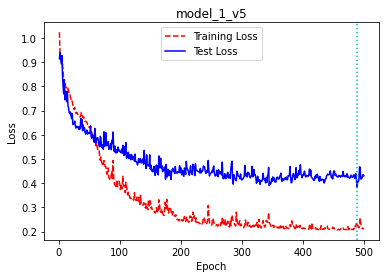

In [36]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='sigmoid'),
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(16, activation='sigmoid'),
      tf.keras.layers.Dense(3)
    ])

learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_3_v5'
model_l_v_e_filename = 'loss_vs_epochs_images/model_3_v5_le.png'
model_l_v_e_title = 'model_1_v5'
model_history_filename = 'history/history_model_3_v5'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 500,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [37]:
best_m3_v5 = load_model(model_filename)
evaluate_model(best_m3_v5, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8290

Test accuracy: 82.9%, test loss: 0.383049


In [38]:
output_filename_test_ds_labeled = 'kaggle_csv/test-ds-m3_v5.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    With sigmoid as activation function for the hidden layers, results were a little worse than before.
    Comparing the 3 activation functions for the hidden layers, tanh was the one that got better results:
   ##### MODEL 3: V6:  Adding dropout layer between the last 2 hidden layers:
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 128, activation = tanh
        2. units = 64, activation = tanh
        3. units = 16, activation = tanh
    Dropout layer with 0.2 probability between hidden layers 2 and 3

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.75532, saving model to models\model_3_v6
INFO:tensorflow:Assets written to: models\model_3_v6\assets
13/13 - 1s - loss: 0.9146 - accuracy: 0.5655 - val_loss: 0.7553 - val_accuracy: 0.6788 - 1s/epoch - 108ms/step
Epoch 2/200

Epoch 2: val_loss improved from 0.75532 to 0.67375, saving model to models\model_3_v6
INFO:tensorflow:Assets written to: models\model_3_v6\assets
13/13 - 1s - loss: 0.7912 - accuracy: 0.6329 - val_loss: 0.6738 - val_accuracy: 0.6943 - 710ms/epoch - 55ms/step
Epoch 3/200

Epoch 3: val_loss improved from 0.67375 to 0.64510, saving model to models\model_3_v6
INFO:tensorflow:Assets written to: models\model_3_v6\assets
13/13 - 1s - loss: 0.7328 - accuracy: 0.6732 - val_loss: 0.6451 - val_accuracy: 0.6632 - 821ms/epoch - 63ms/step
Epoch 4/200

Epoch 4: val_loss improved from 0.64510 to 0.63144, saving model to models\model_3_v6
INFO:tensorflow:Assets written to: models\model_3_v6\assets
13/13 - 1s - loss: 0.7106 - acc

Epoch 39/200

Epoch 39: val_loss did not improve from 0.44903
13/13 - 0s - loss: 0.3385 - accuracy: 0.8716 - val_loss: 0.4564 - val_accuracy: 0.8031 - 76ms/epoch - 6ms/step
Epoch 40/200

Epoch 40: val_loss improved from 0.44903 to 0.44869, saving model to models\model_3_v6
INFO:tensorflow:Assets written to: models\model_3_v6\assets
13/13 - 1s - loss: 0.3467 - accuracy: 0.8560 - val_loss: 0.4487 - val_accuracy: 0.8031 - 982ms/epoch - 76ms/step
Epoch 41/200

Epoch 41: val_loss did not improve from 0.44869
13/13 - 0s - loss: 0.3513 - accuracy: 0.8703 - val_loss: 0.4880 - val_accuracy: 0.8135 - 64ms/epoch - 5ms/step
Epoch 42/200

Epoch 42: val_loss did not improve from 0.44869
13/13 - 0s - loss: 0.3655 - accuracy: 0.8534 - val_loss: 0.4524 - val_accuracy: 0.8135 - 45ms/epoch - 3ms/step
Epoch 43/200

Epoch 43: val_loss did not improve from 0.44869
13/13 - 0s - loss: 0.3372 - accuracy: 0.8638 - val_loss: 0.4600 - val_accuracy: 0.8135 - 52ms/epoch - 4ms/step
Epoch 44/200

Epoch 44: val_loss i

Epoch 82/200

Epoch 82: val_loss did not improve from 0.37327
13/13 - 0s - loss: 0.3255 - accuracy: 0.8612 - val_loss: 0.4248 - val_accuracy: 0.8187 - 55ms/epoch - 4ms/step
Epoch 83/200

Epoch 83: val_loss did not improve from 0.37327
13/13 - 0s - loss: 0.3088 - accuracy: 0.8703 - val_loss: 0.3862 - val_accuracy: 0.8187 - 60ms/epoch - 5ms/step
Epoch 84/200

Epoch 84: val_loss did not improve from 0.37327
13/13 - 0s - loss: 0.2720 - accuracy: 0.8859 - val_loss: 0.3993 - val_accuracy: 0.8290 - 64ms/epoch - 5ms/step
Epoch 85/200

Epoch 85: val_loss did not improve from 0.37327
13/13 - 0s - loss: 0.2937 - accuracy: 0.8768 - val_loss: 0.3979 - val_accuracy: 0.8187 - 62ms/epoch - 5ms/step
Epoch 86/200

Epoch 86: val_loss did not improve from 0.37327
13/13 - 0s - loss: 0.2823 - accuracy: 0.8768 - val_loss: 0.3919 - val_accuracy: 0.8187 - 59ms/epoch - 5ms/step
Epoch 87/200

Epoch 87: val_loss did not improve from 0.37327
13/13 - 0s - loss: 0.2770 - accuracy: 0.8794 - val_loss: 0.4140 - val_acc

Epoch 128/200

Epoch 128: val_loss did not improve from 0.36308
13/13 - 0s - loss: 0.2399 - accuracy: 0.9001 - val_loss: 0.4076 - val_accuracy: 0.8187 - 71ms/epoch - 5ms/step
Epoch 129/200

Epoch 129: val_loss did not improve from 0.36308
13/13 - 0s - loss: 0.2445 - accuracy: 0.8923 - val_loss: 0.3916 - val_accuracy: 0.8238 - 73ms/epoch - 6ms/step
Epoch 130/200

Epoch 130: val_loss did not improve from 0.36308
13/13 - 0s - loss: 0.2463 - accuracy: 0.8923 - val_loss: 0.3999 - val_accuracy: 0.8238 - 45ms/epoch - 3ms/step
Epoch 131/200

Epoch 131: val_loss did not improve from 0.36308
13/13 - 0s - loss: 0.2253 - accuracy: 0.9066 - val_loss: 0.3866 - val_accuracy: 0.8290 - 68ms/epoch - 5ms/step
Epoch 132/200

Epoch 132: val_loss did not improve from 0.36308
13/13 - 0s - loss: 0.2342 - accuracy: 0.8872 - val_loss: 0.3701 - val_accuracy: 0.8290 - 64ms/epoch - 5ms/step
Epoch 133/200

Epoch 133: val_loss did not improve from 0.36308
13/13 - 0s - loss: 0.2466 - accuracy: 0.8936 - val_loss: 0.39

13/13 - 0s - loss: 0.2398 - accuracy: 0.8923 - val_loss: 0.3685 - val_accuracy: 0.8290 - 78ms/epoch - 6ms/step
Epoch 175/200

Epoch 175: val_loss did not improve from 0.35146
13/13 - 0s - loss: 0.2483 - accuracy: 0.8859 - val_loss: 0.3893 - val_accuracy: 0.8187 - 60ms/epoch - 5ms/step
Epoch 176/200

Epoch 176: val_loss did not improve from 0.35146
13/13 - 0s - loss: 0.2450 - accuracy: 0.8885 - val_loss: 0.3804 - val_accuracy: 0.8342 - 48ms/epoch - 4ms/step
Epoch 177/200

Epoch 177: val_loss did not improve from 0.35146
13/13 - 0s - loss: 0.2323 - accuracy: 0.8898 - val_loss: 0.3639 - val_accuracy: 0.8446 - 71ms/epoch - 5ms/step
Epoch 178/200

Epoch 178: val_loss did not improve from 0.35146
13/13 - 0s - loss: 0.2337 - accuracy: 0.8936 - val_loss: 0.3941 - val_accuracy: 0.8446 - 98ms/epoch - 8ms/step
Epoch 179/200

Epoch 179: val_loss did not improve from 0.35146
13/13 - 0s - loss: 0.2373 - accuracy: 0.8949 - val_loss: 0.3918 - val_accuracy: 0.8342 - 63ms/epoch - 5ms/step
Epoch 180/200


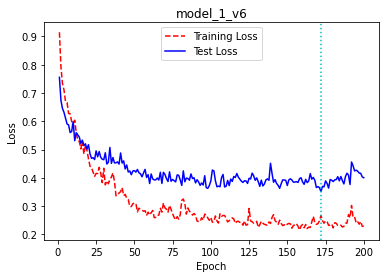

In [57]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='tanh'),
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(16, activation='tanh'),
      tf.keras.layers.Dense(3)
    ])

learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_3_v6'
model_l_v_e_filename = 'loss_vs_epochs_images/model_3_v6_le.png'
model_l_v_e_title = 'model_1_v6'
model_history_filename = 'history/history_model_3_v6'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 200,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [58]:
best_m3_v6 = load_model(model_filename)
evaluate_model(best_m3_v6, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8394

Test accuracy: 83.9%, test loss: 0.351463


In [59]:
output_filename_test_ds_labeled = 'kaggle_csv/test-ds-m3_v6.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    Comparing the results with the previous configuration (v5) without the dropout layer, we got the same test accuracy: 83.9%, but test loss decreased from 0.369002 to 0.351463.
    We will see what happens when we add one more dropout layer:
   ##### MODEL 3: V7:  Adding 2 dropout layer between  hidden layers:
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 128, activation = tanh
        2. units = 64, activation = tanh
        3. units = 16, activation = tanh
    Dropout layer with 0.2 probability hidden layers

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.76839, saving model to models\model_3_v7
INFO:tensorflow:Assets written to: models\model_3_v7\assets
13/13 - 1s - loss: 0.8851 - accuracy: 0.5551 - val_loss: 0.7684 - val_accuracy: 0.6788 - 1s/epoch - 110ms/step
Epoch 2/200

Epoch 2: val_loss improved from 0.76839 to 0.68946, saving model to models\model_3_v7
INFO:tensorflow:Assets written to: models\model_3_v7\assets
13/13 - 1s - loss: 0.7856 - accuracy: 0.6433 - val_loss: 0.6895 - val_accuracy: 0.6943 - 723ms/epoch - 56ms/step
Epoch 3/200

Epoch 3: val_loss improved from 0.68946 to 0.65342, saving model to models\model_3_v7
INFO:tensorflow:Assets written to: models\model_3_v7\assets
13/13 - 1s - loss: 0.7427 - accuracy: 0.6693 - val_loss: 0.6534 - val_accuracy: 0.6943 - 768ms/epoch - 59ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 0.65342
13/13 - 0s - loss: 0.7457 - accuracy: 0.6446 - val_loss: 0.7340 - val_accuracy: 0.7202 - 66ms/epoch - 5ms/step
Epoch 5/200

Epoch 

Epoch 39/200

Epoch 39: val_loss did not improve from 0.44447
13/13 - 0s - loss: 0.4026 - accuracy: 0.8431 - val_loss: 0.4762 - val_accuracy: 0.7876 - 64ms/epoch - 5ms/step
Epoch 40/200

Epoch 40: val_loss did not improve from 0.44447
13/13 - 0s - loss: 0.4095 - accuracy: 0.8249 - val_loss: 0.4551 - val_accuracy: 0.7927 - 74ms/epoch - 6ms/step
Epoch 41/200

Epoch 41: val_loss improved from 0.44447 to 0.44220, saving model to models\model_3_v7
INFO:tensorflow:Assets written to: models\model_3_v7\assets
13/13 - 1s - loss: 0.3821 - accuracy: 0.8612 - val_loss: 0.4422 - val_accuracy: 0.7927 - 1s/epoch - 77ms/step
Epoch 42/200

Epoch 42: val_loss improved from 0.44220 to 0.43425, saving model to models\model_3_v7
INFO:tensorflow:Assets written to: models\model_3_v7\assets
13/13 - 1s - loss: 0.3680 - accuracy: 0.8612 - val_loss: 0.4343 - val_accuracy: 0.8083 - 1s/epoch - 81ms/step
Epoch 43/200

Epoch 43: val_loss did not improve from 0.43425
13/13 - 0s - loss: 0.3869 - accuracy: 0.8457 - val

Epoch 82/200

Epoch 82: val_loss did not improve from 0.39083
13/13 - 0s - loss: 0.2865 - accuracy: 0.8807 - val_loss: 0.4054 - val_accuracy: 0.8290 - 64ms/epoch - 5ms/step
Epoch 83/200

Epoch 83: val_loss did not improve from 0.39083
13/13 - 0s - loss: 0.2966 - accuracy: 0.8755 - val_loss: 0.4065 - val_accuracy: 0.8238 - 71ms/epoch - 5ms/step
Epoch 84/200

Epoch 84: val_loss did not improve from 0.39083
13/13 - 0s - loss: 0.2824 - accuracy: 0.8898 - val_loss: 0.4064 - val_accuracy: 0.8238 - 86ms/epoch - 7ms/step
Epoch 85/200

Epoch 85: val_loss did not improve from 0.39083
13/13 - 0s - loss: 0.2722 - accuracy: 0.8923 - val_loss: 0.4092 - val_accuracy: 0.8238 - 99ms/epoch - 8ms/step
Epoch 86/200

Epoch 86: val_loss did not improve from 0.39083
13/13 - 0s - loss: 0.2826 - accuracy: 0.8794 - val_loss: 0.4075 - val_accuracy: 0.8290 - 89ms/epoch - 7ms/step
Epoch 87/200

Epoch 87: val_loss did not improve from 0.39083
13/13 - 0s - loss: 0.2796 - accuracy: 0.8923 - val_loss: 0.4087 - val_acc

Epoch 129/200

Epoch 129: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2786 - accuracy: 0.8872 - val_loss: 0.4314 - val_accuracy: 0.8238 - 77ms/epoch - 6ms/step
Epoch 130/200

Epoch 130: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.3035 - accuracy: 0.8716 - val_loss: 0.4234 - val_accuracy: 0.8238 - 72ms/epoch - 6ms/step
Epoch 131/200

Epoch 131: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2892 - accuracy: 0.8690 - val_loss: 0.3979 - val_accuracy: 0.8290 - 89ms/epoch - 7ms/step
Epoch 132/200

Epoch 132: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.3336 - accuracy: 0.8495 - val_loss: 0.4277 - val_accuracy: 0.8290 - 83ms/epoch - 6ms/step
Epoch 133/200

Epoch 133: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.3365 - accuracy: 0.8508 - val_loss: 0.4376 - val_accuracy: 0.8187 - 61ms/epoch - 5ms/step
Epoch 134/200

Epoch 134: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.3051 - accuracy: 0.8729 - val_loss: 0.43

Epoch 176/200

Epoch 176: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2489 - accuracy: 0.8975 - val_loss: 0.4511 - val_accuracy: 0.8187 - 62ms/epoch - 5ms/step
Epoch 177/200

Epoch 177: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2370 - accuracy: 0.9001 - val_loss: 0.4442 - val_accuracy: 0.8187 - 58ms/epoch - 4ms/step
Epoch 178/200

Epoch 178: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2436 - accuracy: 0.8859 - val_loss: 0.4438 - val_accuracy: 0.8238 - 49ms/epoch - 4ms/step
Epoch 179/200

Epoch 179: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2478 - accuracy: 0.8923 - val_loss: 0.4268 - val_accuracy: 0.8187 - 51ms/epoch - 4ms/step
Epoch 180/200

Epoch 180: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2606 - accuracy: 0.8820 - val_loss: 0.4289 - val_accuracy: 0.8290 - 49ms/epoch - 4ms/step
Epoch 181/200

Epoch 181: val_loss did not improve from 0.38651
13/13 - 0s - loss: 0.2508 - accuracy: 0.8872 - val_loss: 0.43

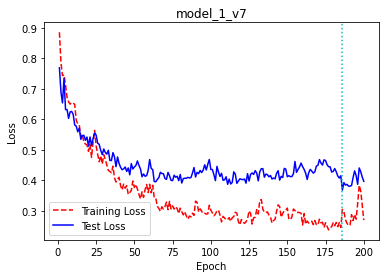

In [62]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='tanh'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(16, activation='tanh'),
      tf.keras.layers.Dense(3)
    ])

learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_3_v7'
model_l_v_e_filename = 'loss_vs_epochs_images/model_3_v7_le.png'
model_l_v_e_title = 'model_1_v7'
model_history_filename = 'history/history_model_3_v7'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 200,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [87]:
best_m3_v7 = load_model(model_filename)
evaluate_model(best_m3_v7, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8187

Test accuracy: 81.9%, test loss: 0.420426


In [ ]:
output_filename_test_ds_labeled = 'test-ds-m3_v7.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

    Adding one more dropout layer did not improve the results. The model had more trouble learning.
    Now we will compare our results:

In [10]:
def plot_param(num_versions, param_name='val_accuracy'):
    params = []
    legend = []
    for i in range(1,num_versions+1):
        param = load_history(f'history/history_model_3_v{i}.npy')[param_name][:200]
        x = range(len(param))
        params.append(param)
        plt.plot(x,param)
        legend.append(f"m1v{i}")
    plt.legend(legend, loc="upper right")
    plt.show()

##### Test loss:

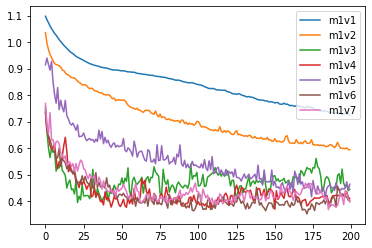

In [11]:
plot_param(7, param_name='val_loss')

##### Test accuracy:

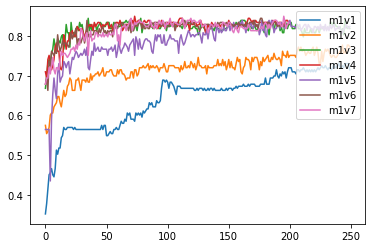

In [9]:
plot_param(7)

#### Conclusions:
    With 3 hidden layers, we got a maximum test accuracy of 83.9% and minimum test loss of 0.351463, in version 6, with tanh as activation fn for hidden layers and a dropout layer between the 2 last hidden layers.
    However, this results are not better than the ones we got with other models, so we will not submit these to kaggle.